## Introduction

Previously, a data-driven model was developed to predict the OD with the reinforcement from Raman prediction data based on the EKF framework. The objective is to build a hybrid model that can predict the Kalman gain based on the process paramater inputs. In file "B100 OD prediction_v8", the Kalman gain are collected for each batch, and they will be used as training data.

The Kalman value is calcualted from "EKF_v1" for the 20 batches where Raman measurement is available.THey are saved in Excel for each Batch.

#### Import the dataset

In [4]:
import pandas as pd
import glob

# Get all CSV files matching the pattern
files = glob.glob('kalman_results_merged_*.csv')
# Initialize an empty list to hold DataFrames
dataframes = []

# Loop through the files and read them into DataFrames
for file in files:
    df = pd.read_csv(file)  
    dataframes.append(df)

# Concatenate all DataFrames into one
df = pd.concat(dataframes, ignore_index=True)
df

,OD- Offline measurement,Age,Predictions_Raman,Predictions_Model,Acid_Tank_Weight,Agitator_VFD_Current_Value,Airflow_Current_Value,Antifoam_Tank_Temperature,Antifoam_Tank_Weight,Dissolved_Oxygen,...,Oxygen Gas (%),Seal_Pressure_Controller,Voltage_Foam_Echo_Amplitude,cP_Supplement_Tank_Weight,SAP,Kalman Gain,Corrected_Prediction,mse_predictions_model,mse_corrected_prediction,percentage_drop
0,0.492,0.00,0.48270,0.786540,1.201920,-2.958119,-1.159191,0.504192,1.751684,-0.471279,...,0.892126,-1.292473,-1.150298,0.743882,3CA3683,0.916667,0.508020,1.131643,1.150959,-1.706935
1,NaN,4.27,0.63497,0.872500,1.186966,-1.479867,-1.157047,0.315843,1.590349,1.257333,...,0.076101,-1.290395,-1.123726,0.739655,3CA3683,0.657143,0.716409,1.131643,1.150959,-1.706935
2,NaN,5.33,0.76210,0.870295,1.183665,-1.184154,-1.159191,0.272133,1.554063,1.199986,...,-0.077039,-1.285825,-1.087149,0.740164,3CA3683,0.623656,0.802819,1.131643,1.150959,-1.706935
3,NaN,8.60,1.42272,1.106802,1.176031,-0.509816,-1.137755,0.177074,1.436808,0.902699,...,-0.524351,-1.146378,-1.009612,0.742760,3CA3683,0.618852,1.302309,1.131643,1.150959,-1.706935
4,NaN,9.67,1.62210,1.025091,1.184653,-0.357803,-1.132396,0.152237,1.451703,0.637053,...,-0.746450,-1.264754,-1.006180,0.740894,3CA3683,0.618153,1.394134,1.131643,1.150959,-1.706935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,6.920,28.00,5.75900,0.967164,0.999325,-1.094678,-1.151822,1.090187,0.882656,0.837534,...,-0.190201,0.263203,-0.958732,0.737230,NCDCA1747,0.623656,3.955621,28.411198,4.572260,83.906838
115,8.080,36.00,7.48570,2.363491,0.929866,0.000487,-1.078109,0.014957,0.566220,-0.259991,...,-1.346776,0.282232,-0.791929,0.739104,NCDCA1747,0.618852,5.533383,28.411198,4.572260,83.906838
116,0.490,0.00,0.48951,3.895948,0.012986,0.248585,0.084065,-0.706849,-0.072106,0.166427,...,-1.089831,-0.050266,-0.282794,0.356702,NCDCA2217,0.916667,0.773380,30.084687,2.726685,90.936634
117,1.980,10.00,1.87130,8.949139,-0.900573,0.257976,1.082598,-0.867003,-0.880185,0.341835,...,-0.973717,0.167180,0.106426,-1.069061,NCDCA2217,0.657143,4.297988,30.084687,2.726685,90.936634


In [18]:
import pandas as pd

# Assuming df is already loaded and contains 'SAP', 'percentage_drop', 'mse_predictions_model', 'mse_corrected_prediction'

# Group by 'SAP' and calculate the mean for 'percentage_drop', 'mse_predictions_model', and 'mse_corrected_prediction'
df_mse = df.groupby('SAP', as_index=False)[['percentage_drop', 'mse_predictions_model', 'mse_corrected_prediction']].mean()

# Display the new DataFrame
print(df_mse)


          SAP  percentage_drop  mse_predictions_model  \
0     3CA3683        -1.706935               1.131643   
1     3CA3684        24.223511               1.872424   
2     3CA4310        98.961067               0.060270   
3     3CA4397        96.309547               9.775823   
4     3CA5366        94.917167               6.718044   
5     3CA5418        98.483221              10.116209   
6     4CA1195              NaN                    NaN   
7     4CA1809              NaN                    NaN   
8   NCDCA0358        89.591077              19.938008   
9   NCDCA0359        88.730731              39.533542   
10  NCDCA0521        90.112920              35.429714   
11  NCDCA0522        91.540974              30.351266   
12  NCDCA1082        89.941029              33.207780   
13  NCDCA1083        84.679813              26.229272   
14  NCDCA1232        94.619984              20.825879   
15  NCDCA1235        83.217930              31.993201   
16  NCDCA1345        84.631096 

In [19]:
# Remove rows with NaN values in df_mse
df_mse_cleaned = df_mse.dropna()

# Show the cleaned DataFrame
print(df_mse_cleaned)


          SAP  percentage_drop  mse_predictions_model  \
0     3CA3683        -1.706935               1.131643   
1     3CA3684        24.223511               1.872424   
2     3CA4310        98.961067               0.060270   
3     3CA4397        96.309547               9.775823   
4     3CA5366        94.917167               6.718044   
5     3CA5418        98.483221              10.116209   
8   NCDCA0358        89.591077              19.938008   
9   NCDCA0359        88.730731              39.533542   
10  NCDCA0521        90.112920              35.429714   
11  NCDCA0522        91.540974              30.351266   
12  NCDCA1082        89.941029              33.207780   
13  NCDCA1083        84.679813              26.229272   
14  NCDCA1232        94.619984              20.825879   
15  NCDCA1235        83.217930              31.993201   
16  NCDCA1345        84.631096              27.369284   
17  NCDCA1347        88.459631              27.413533   
18  NCDCA1747        83.906838 

In [146]:
print(df.columns.tolist())


['OD- Offline measurement', 'Age', 'Predictions_Raman', 'Predictions_Model', 'Acid_Tank_Weight', 'Agitator_VFD_Current_Value', 'Airflow_Current_Value', 'Antifoam_Tank_Temperature', 'Antifoam_Tank_Weight', 'Dissolved_Oxygen', 'Fermentor_Skid_Pressure', 'Fermentor_Skid_Temperature', 'Fermentor_Weight', 'Fermentor_pH_Probe_A', 'Fermentor_pH_Probe_B', 'Gas_Analyzer_CER Ratio', 'Gas_Analyzer_OUR Ratio', 'Jacket_Temperature', 'Oxygen Gas (%)', 'Seal_Pressure_Controller', 'Voltage_Foam_Echo_Amplitude', 'cP_Supplement_Tank_Weight', 'SAP', 'Kalman Gain', 'Corrected_Prediction', 'mse_predictions_model', 'mse_corrected_prediction', 'percentage_drop']


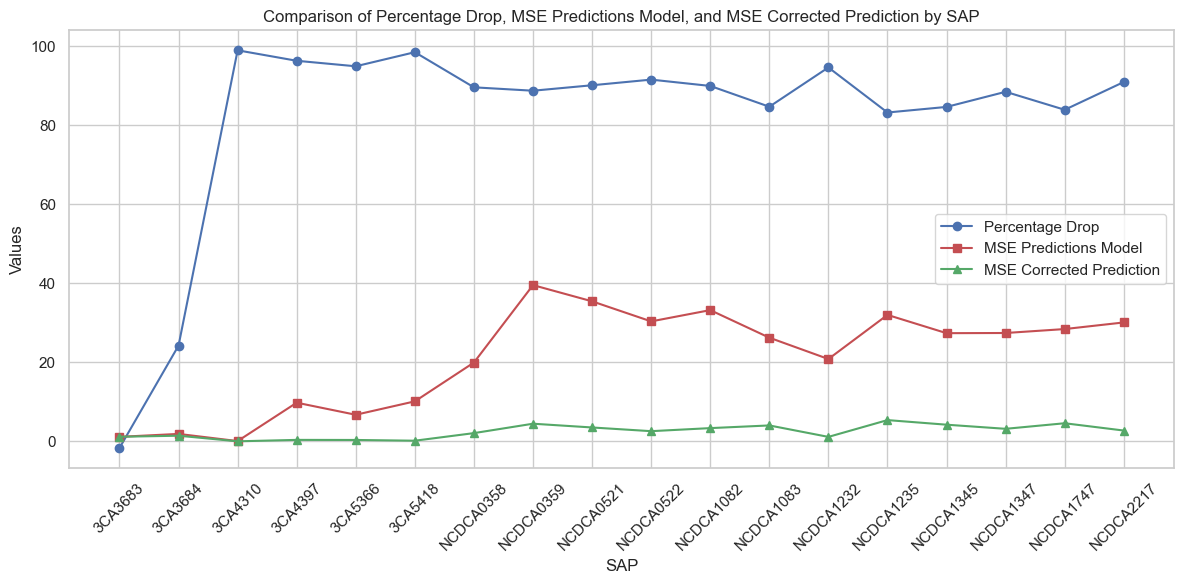

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure for plotting
plt.figure(figsize=(12, 6))

# Plot the three columns: 'percentage_drop', 'mse_predictions_model', 'mse_corrected_prediction'
plt.plot(df_mse_cleaned['SAP'], df_mse_cleaned['percentage_drop'], label='Percentage Drop', marker='o', linestyle='-', color='b')
plt.plot(df_mse_cleaned['SAP'], df_mse_cleaned['mse_predictions_model'], label='MSE Predictions Model', marker='s', linestyle='-', color='r')
plt.plot(df_mse_cleaned['SAP'], df_mse_cleaned['mse_corrected_prediction'], label='MSE Corrected Prediction', marker='^', linestyle='-', color='g')

# Adding titles and labels
plt.title('Comparison of Percentage Drop, MSE Predictions Model, and MSE Corrected Prediction by SAP')
plt.xlabel('SAP')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


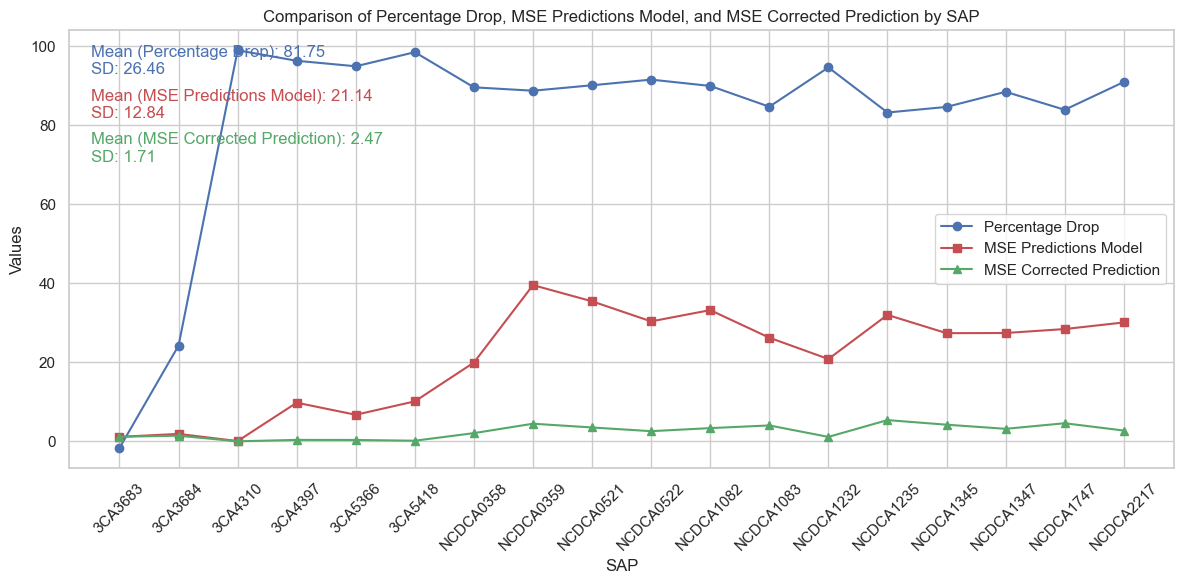

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate the mean and standard deviation for each column
mean_percentage_drop = df_mse_cleaned['percentage_drop'].mean()
std_percentage_drop = df_mse_cleaned['percentage_drop'].std()

mean_mse_predictions_model = df_mse_cleaned['mse_predictions_model'].mean()
std_mse_predictions_model = df_mse_cleaned['mse_predictions_model'].std()

mean_mse_corrected_prediction = df_mse_cleaned['mse_corrected_prediction'].mean()
std_mse_corrected_prediction = df_mse_cleaned['mse_corrected_prediction'].std()

# Create a figure for plotting
plt.figure(figsize=(12, 6))

# Plot the three columns: 'percentage_drop', 'mse_predictions_model', 'mse_corrected_prediction'
plt.plot(df_mse_cleaned['SAP'], df_mse_cleaned['percentage_drop'], label='Percentage Drop', marker='o', linestyle='-', color='b')
plt.plot(df_mse_cleaned['SAP'], df_mse_cleaned['mse_predictions_model'], label='MSE Predictions Model', marker='s', linestyle='-', color='r')
plt.plot(df_mse_cleaned['SAP'], df_mse_cleaned['mse_corrected_prediction'], label='MSE Corrected Prediction', marker='^', linestyle='-', color='g')

# Add annotations for mean and SD
plt.text(0.02, 0.9, f'Mean (Percentage Drop): {mean_percentage_drop:.2f}\nSD: {std_percentage_drop:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, color='b')

plt.text(0.02, 0.8, f'Mean (MSE Predictions Model): {mean_mse_predictions_model:.2f}\nSD: {std_mse_predictions_model:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, color='r',)

plt.text(0.02, 0.7, f'Mean (MSE Corrected Prediction): {mean_mse_corrected_prediction:.2f}\nSD: {std_mse_corrected_prediction:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, color='g',)

# Adding titles and labels
plt.title('Comparison of Percentage Drop, MSE Predictions Model, and MSE Corrected Prediction by SAP')
plt.xlabel('SAP')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Conclusion 1: The MSE prediction drop is signifinct for the twenty batches where.

## Model Development

The objective is to develop a model using Process parameters as input to predict Kalman gain.

### Model setup

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Example model
from sklearn.metrics import mean_squared_error

# Select features and target variable
features = [
    'Age', 
    'Acid_Tank_Weight', 
    'Agitator_VFD_Current_Value', 
    'Airflow_Current_Value', 
    'Antifoam_Tank_Temperature', 
    'Antifoam_Tank_Weight', 
    'Dissolved_Oxygen', 
    'Fermentor_Skid_Pressure', 
    'Fermentor_Skid_Temperature', 
    'Fermentor_Weight', 
    'Fermentor_pH_Probe_A', 
    'Fermentor_pH_Probe_B', 
    'Gas_Analyzer_CER Ratio', 
    'Gas_Analyzer_OUR Ratio', 
    'Jacket_Temperature', 
    'Oxygen Gas (%)', 
    'Seal_Pressure_Controller', 
    'Voltage_Foam_Echo_Amplitude', 
    'cP_Supplement_Tank_Weight'
]

# Create X and y
X = df[features]
y = df['Kalman Gain']

# Optional: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
X

,Age,Acid_Tank_Weight,Agitator_VFD_Current_Value,Airflow_Current_Value,Antifoam_Tank_Temperature,Antifoam_Tank_Weight,Dissolved_Oxygen,Fermentor_Skid_Pressure,Fermentor_Skid_Temperature,Fermentor_Weight,Fermentor_pH_Probe_A,Fermentor_pH_Probe_B,Gas_Analyzer_CER Ratio,Gas_Analyzer_OUR Ratio,Jacket_Temperature,Oxygen Gas (%),Seal_Pressure_Controller,Voltage_Foam_Echo_Amplitude,cP_Supplement_Tank_Weight
0,0.00,1.201920,-2.958119,-1.159191,0.504192,1.751684,-0.471279,-0.043419,-0.201804,-1.189389,1.202193,1.375722,-0.939266,-0.888939,0.506507,0.892126,-1.292473,-1.150298,0.743882
1,4.27,1.186966,-1.479867,-1.157047,0.315843,1.590349,1.257333,-0.200941,-0.214775,-1.177380,-1.286917,-0.706532,-0.317104,0.108140,1.649200,0.076101,-1.290395,-1.123726,0.739655
2,5.33,1.183665,-1.184154,-1.159191,0.272133,1.554063,1.199986,-0.200495,0.070385,-1.177277,-1.186479,-0.609225,-0.193177,0.256403,2.009644,-0.077039,-1.285825,-1.087149,0.740164
3,8.60,1.176031,-0.509816,-1.137755,0.177074,1.436808,0.902699,-0.198795,0.392697,-1.171105,-0.461879,-0.003964,0.069851,0.701248,0.160493,-0.524351,-1.146378,-1.009612,0.742760
4,9.67,1.184653,-0.357803,-1.132396,0.152237,1.451703,0.637053,-0.197509,-0.164164,-1.194787,-0.257283,0.160419,0.275027,0.915539,-0.967412,-0.746450,-1.264754,-1.006180,0.740894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,28.00,0.999325,-1.094678,-1.151822,1.090187,0.882656,0.837534,-0.096430,0.030237,-0.772061,-1.647306,-0.887457,-0.046341,0.370132,-0.195119,-0.190201,0.263203,-0.958732,0.737230
115,36.00,0.929866,0.000487,-1.078109,0.014957,0.566220,-0.259991,-0.123398,0.066030,-0.738634,0.065929,0.547947,1.243155,1.538588,0.098924,-1.346776,0.282232,-0.791929,0.739104
116,0.00,0.012986,0.248585,0.084065,-0.706849,-0.072106,0.166427,-0.053521,0.037704,-0.177290,0.031496,0.447650,1.505967,1.223951,0.324240,-1.089831,-0.050266,-0.282794,0.356702
117,10.00,-0.900573,0.257976,1.082598,-0.867003,-0.880185,0.341835,0.074246,-0.017563,1.078641,0.040946,0.347044,1.301883,1.132246,0.075206,-0.973717,0.167180,0.106426,-1.069061


#### 01 Random Forest Model

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Initialize the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse_rf:.4f}')
print(f'R-squared (R²): {r2_rf:.4f}')
print(f'Mean Absolute Error (MAE): {mae_rf:.4f}')

Mean Squared Error (MSE): 0.0030
R-squared (R²): 0.7436
Mean Absolute Error (MAE): 0.0156


#### 02 PLS Model

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the PLS regression model
pls_model = PLSRegression(n_components=3)  # You can adjust n_components based on your needs

# Train the model
pls_model.fit(X_train, y_train)

# Make predictions
y_pred_pls = pls_model.predict(X_test)

# Evaluate the model
mse_pls = mean_squared_error(y_test, y_pred_pls)
r2_pls = r2_score(y_test, y_pred_pls)
mae_pls = mean_absolute_error(y_test, y_pred_pls)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse_pls:.4f}')
print(f'R-squared (R²): {r2_pls:.4f}')
print(f'Mean Absolute Error (MAE): {mae_pls:.4f}')

Mean Squared Error (MSE): 0.0070
R-squared (R²): 0.4091
Mean Absolute Error (MAE): 0.0693


#### 03 XGBoost Model

In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the XGBoost regression model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse_xgb:.4f}')
print(f'R-squared (R²): {r2_xgb:.4f}')
print(f'Mean Absolute Error (MAE): {mae_xgb:.4f}')


Mean Squared Error (MSE): 0.0033
R-squared (R²): 0.7252
Mean Absolute Error (MAE): 0.0163


#### Compile the result

In [31]:
results = {
    'Model': ['Random Forest', 'PLS', 'XGBoost'],
    'MSE': [mse_rf, mse_pls, mse_xgb],
    'R^2': [r2_rf, r2_pls, r2_xgb],
    'MAE': [mae_rf, mae_pls, mae_xgb]
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Model,MSE,R^2,MAE
0,Random Forest,0.003039,0.743624,0.015570
1,PLS,0.007004,0.409086,0.069262
2,XGBoost,0.003257,0.725199,0.016349


## Test the model

### Prepare the dataset

In [32]:
import pandas as pd

file_path = 'B100_cP_4000_L_data_02Aug2024.csv' 
cP_df = pd.read_csv(file_path)
cP_df = cP_df[cP_df['Fermentation'] == True]
cP_df = cP_df.drop(columns=['Fermentation'])
cP_df['Age'] = cP_df['Age'].round(2)

tags_to_drop = ["Glutamate_Concentration", "Glutamate_Concentration_DMODX"]

# Filter the DataFrame to exclude rows with the specified TagID values
cP_df = cP_df[~cP_df['TagID'].isin(tags_to_drop)]

cP_df = cP_df.drop(columns=['Process_Step','Timestamp', 'Last_Updated','EquipmentID'])

In [33]:
# Pivot the dataframe
cP_df_pivot = cP_df.pivot_table(index=['SAP', 'Age'], columns='TagID', values='Value').reset_index()
cP_df_pivot

TagID,SAP,Age,Acid_Tank_Weight,Agitator_VFD_Current_Value,Airflow_Current_Value,Antifoam_Tank_Temperature,Antifoam_Tank_Weight,Dissolved_Oxygen,Fermentor_Skid_Pressure,Fermentor_Skid_Temperature,Fermentor_Weight,Fermentor_pH_Probe_A,Fermentor_pH_Probe_B,Gas_Analyzer_CER Ratio,Gas_Analyzer_OUR Ratio,Jacket_Temperature,Oxygen Gas (%),Seal_Pressure_Controller,Voltage_Foam_Echo_Amplitude,cP_Supplement_Tank_Weight
0,3CA3489,0.00,146.370987,62.018430,153.000000,29.106360,36.970000,63.992100,0.143882,36.060425,2761.83984,7.205970,7.192805,0.0,0.433216,35.992490,20.198816,19.732876,6.616014,249.032669
1,3CA3489,0.03,146.373215,62.307884,106.500000,29.106950,36.743336,12.113700,0.065651,36.076748,2762.30900,7.205966,7.191095,0.0,0.433216,36.433960,20.025131,19.812042,4.452748,249.040054
2,3CA3489,0.07,146.361000,62.594276,106.625000,29.102137,36.730000,2.086756,0.065615,36.083534,2762.97974,7.201891,7.189330,0.0,0.219999,35.703674,19.851448,18.743958,4.528327,249.047455
3,3CA3489,0.10,146.389038,62.880634,106.399994,29.107002,36.728573,8.575014,0.065579,36.046360,2762.83984,7.199189,7.187338,0.0,0.429186,35.438560,19.660587,16.753440,4.511223,249.054855
4,3CA3489,0.13,146.376251,63.166912,107.000000,29.100983,36.745937,12.184182,0.065542,36.007553,2762.85000,7.196096,7.183259,0.0,0.399185,35.169280,19.469583,16.545090,4.587913,249.062241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46667,NCDCA5337,48.03,4.354001,135.797775,367.000000,24.786755,8.026667,25.118270,0.144963,35.988857,3081.84000,7.200136,7.091115,NaN,NaN,34.989410,0.000000,16.938728,37.086704,69.575000
46668,NCDCA5337,48.07,4.212500,135.797775,368.000000,24.777245,8.056251,39.886800,0.144776,36.012005,3081.79980,7.199817,7.089794,NaN,NaN,35.169250,0.000000,16.722122,37.474537,69.241660
46669,NCDCA5337,48.10,3.924000,135.797800,368.000000,24.764114,8.080000,30.807371,0.144588,35.997420,3082.29000,7.199180,7.088109,NaN,NaN,34.513275,0.000000,18.563599,38.617750,68.939590
46670,NCDCA5337,48.13,3.906000,135.797821,369.000000,24.755167,7.958750,24.129421,0.144401,36.016273,3082.04000,7.199839,7.088767,NaN,NaN,35.255226,0.000000,19.601585,37.883663,68.734810


#### Check and Remove NaN

In [34]:
# Check for NaN values in cP_df_pivot
nan_count = cP_df_pivot.isna().sum()

# Display the count of NaN values for each column
print("Count of NaN values in each column:")
print(nan_count)

# Remove rows with any NaN values
cP_df_pivot_cleaned = cP_df_pivot.dropna()

# Display the cleaned DataFrame shape
print(f"Original DataFrame shape: {cP_df_pivot.shape}")
print(f"Cleaned DataFrame shape: {cP_df_pivot_cleaned.shape}")

Count of NaN values in each column:
TagID
SAP                               0
Age                               0
Acid_Tank_Weight                  0
Agitator_VFD_Current_Value        0
Airflow_Current_Value             0
Antifoam_Tank_Temperature         0
Antifoam_Tank_Weight              0
Dissolved_Oxygen                  0
Fermentor_Skid_Pressure           0
Fermentor_Skid_Temperature        0
Fermentor_Weight                  0
Fermentor_pH_Probe_A              0
Fermentor_pH_Probe_B              0
Gas_Analyzer_CER Ratio         6603
Gas_Analyzer_OUR Ratio         6603
Jacket_Temperature                0
Oxygen Gas (%)                    0
Seal_Pressure_Controller          0
Voltage_Foam_Echo_Amplitude       2
cP_Supplement_Tank_Weight         0
dtype: int64
Original DataFrame shape: (46672, 20)
Cleaned DataFrame shape: (40067, 20)


#### Standardize the input

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

features_to_standardize = [ 
    'Acid_Tank_Weight', 
    'Agitator_VFD_Current_Value', 
    'Airflow_Current_Value', 
    'Antifoam_Tank_Temperature', 
    'Antifoam_Tank_Weight', 
    'Dissolved_Oxygen', 
    'Fermentor_Skid_Pressure', 
    'Fermentor_Skid_Temperature', 
    'Fermentor_Weight', 
    'Fermentor_pH_Probe_A', 
    'Fermentor_pH_Probe_B', 
    'Gas_Analyzer_CER Ratio', 
    'Gas_Analyzer_OUR Ratio', 
    'Jacket_Temperature', 
    'Oxygen Gas (%)', 
    'Seal_Pressure_Controller', 
    'Voltage_Foam_Echo_Amplitude', 
    'cP_Supplement_Tank_Weight'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
cP_df_standardized = cP_df_pivot_cleaned.copy()
cP_df_standardized[features_to_standardize] = scaler.fit_transform(cP_df_pivot_cleaned[features_to_standardize])

# Display the standardized DataFrame
cP_df_standardized

TagID,SAP,Age,Acid_Tank_Weight,Agitator_VFD_Current_Value,Airflow_Current_Value,Antifoam_Tank_Temperature,Antifoam_Tank_Weight,Dissolved_Oxygen,Fermentor_Skid_Pressure,Fermentor_Skid_Temperature,Fermentor_Weight,Fermentor_pH_Probe_A,Fermentor_pH_Probe_B,Gas_Analyzer_CER Ratio,Gas_Analyzer_OUR Ratio,Jacket_Temperature,Oxygen Gas (%),Seal_Pressure_Controller,Voltage_Foam_Echo_Amplitude,cP_Supplement_Tank_Weight
0,3CA3489,0.00,1.151515,-2.971734,-0.666176,0.328248,1.848329,2.534552,-0.056213,0.152723,-0.891786,0.105481,0.054801,-0.939266,-0.853895,0.939419,0.971967,1.462159,-1.031071,0.799969
1,3CA3489,0.03,1.151568,-2.959059,-1.164549,0.328435,1.812997,-0.863953,-0.119530,0.187117,-0.887038,0.105435,0.037485,-0.939266,-0.853895,1.335184,0.930033,1.507026,-1.135565,0.800074
2,3CA3489,0.07,1.151278,-2.946518,-1.163210,0.326914,1.810918,-1.520808,-0.119559,0.201416,-0.880250,0.055837,0.019601,-0.939266,-0.906068,0.680504,0.888100,0.901692,-1.131914,0.800179
3,3CA3489,0.10,1.151942,-2.933979,-1.165621,0.328451,1.810696,-1.095769,-0.119588,0.123088,-0.881666,0.022945,-0.000568,-0.939266,-0.854881,0.442837,0.842020,-0.226428,-1.132740,0.800284
4,3CA3489,0.13,1.151639,-2.921444,-1.159191,0.326549,1.813403,-0.859336,-0.119618,0.041321,-0.881563,-0.014700,-0.041880,-0.939266,-0.862222,0.201435,0.795904,-0.344510,-1.129036,0.800389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42286,NCDCA2365,46.97,-1.690611,0.258889,1.266586,-1.090701,-1.825305,0.240906,0.216211,0.012490,2.214746,0.045286,0.321628,1.301883,1.132246,0.264934,-0.973717,0.130295,0.360976,-2.366783
42287,NCDCA2365,47.00,-1.694472,0.258890,1.268372,-1.094363,-1.823152,0.032481,0.217545,0.038702,2.222642,0.021990,0.301923,1.301883,1.132246,-0.688303,-0.973717,0.179088,0.335197,-2.369084
42288,NCDCA2365,47.03,-1.697124,0.258891,1.268372,-1.095927,-1.808084,0.095663,0.218879,0.009477,2.218189,0.060870,0.313118,1.301883,1.132246,0.103684,-0.973717,0.269831,0.356722,-2.371996
42289,NCDCA2365,47.07,-1.698783,0.258892,1.263013,-1.101680,-1.808604,0.260999,0.220213,0.058908,2.226386,0.011021,0.309231,1.301883,1.132246,-0.337382,-0.973717,0.248207,0.365440,-2.382796


### Model Prediction

#### Make prediction of Kalman Gain

In [37]:
# Select the features from cP_df_pivot
X_cP = cP_df_standardized[features]

# Make predictions using the trained Random Forest model
predict_K = model_rf.predict(X_cP)

# Create a new DataFrame with the selected features and predictions
cP_df_predict = cP_df_standardized.copy()
cP_df_predict['Predicted_Kalman_Gain'] = predict_K  # Add predictions

cP_df_predict

TagID,SAP,Age,Acid_Tank_Weight,Agitator_VFD_Current_Value,Airflow_Current_Value,Antifoam_Tank_Temperature,Antifoam_Tank_Weight,Dissolved_Oxygen,Fermentor_Skid_Pressure,Fermentor_Skid_Temperature,...,Fermentor_pH_Probe_A,Fermentor_pH_Probe_B,Gas_Analyzer_CER Ratio,Gas_Analyzer_OUR Ratio,Jacket_Temperature,Oxygen Gas (%),Seal_Pressure_Controller,Voltage_Foam_Echo_Amplitude,cP_Supplement_Tank_Weight,Predicted_Kalman_Gain
0,3CA3489,0.00,1.151515,-2.971734,-0.666176,0.328248,1.848329,2.534552,-0.056213,0.152723,...,0.105481,0.054801,-0.939266,-0.853895,0.939419,0.971967,1.462159,-1.031071,0.799969,0.916667
1,3CA3489,0.03,1.151568,-2.959059,-1.164549,0.328435,1.812997,-0.863953,-0.119530,0.187117,...,0.105435,0.037485,-0.939266,-0.853895,1.335184,0.930033,1.507026,-1.135565,0.800074,0.916667
2,3CA3489,0.07,1.151278,-2.946518,-1.163210,0.326914,1.810918,-1.520808,-0.119559,0.201416,...,0.055837,0.019601,-0.939266,-0.906068,0.680504,0.888100,0.901692,-1.131914,0.800179,0.916667
3,3CA3489,0.10,1.151942,-2.933979,-1.165621,0.328451,1.810696,-1.095769,-0.119588,0.123088,...,0.022945,-0.000568,-0.939266,-0.854881,0.442837,0.842020,-0.226428,-1.132740,0.800284,0.916667
4,3CA3489,0.13,1.151639,-2.921444,-1.159191,0.326549,1.813403,-0.859336,-0.119618,0.041321,...,-0.014700,-0.041880,-0.939266,-0.862222,0.201435,0.795904,-0.344510,-1.129036,0.800389,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42286,NCDCA2365,46.97,-1.690611,0.258889,1.266586,-1.090701,-1.825305,0.240906,0.216211,0.012490,...,0.045286,0.321628,1.301883,1.132246,0.264934,-0.973717,0.130295,0.360976,-2.366783,0.659197
42287,NCDCA2365,47.00,-1.694472,0.258890,1.268372,-1.094363,-1.823152,0.032481,0.217545,0.038702,...,0.021990,0.301923,1.301883,1.132246,-0.688303,-0.973717,0.179088,0.335197,-2.369084,0.647657
42288,NCDCA2365,47.03,-1.697124,0.258891,1.268372,-1.095927,-1.808084,0.095663,0.218879,0.009477,...,0.060870,0.313118,1.301883,1.132246,0.103684,-0.973717,0.269831,0.356722,-2.371996,0.659530
42289,NCDCA2365,47.07,-1.698783,0.258892,1.263013,-1.101680,-1.808604,0.260999,0.220213,0.058908,...,0.011021,0.309231,1.301883,1.132246,-0.337382,-0.973717,0.248207,0.365440,-2.382796,0.647979


#### Make Prediction of OD

In [38]:
import joblib

# Load the model
rf_model_processsParameters = joblib.load('rf_model_processsParameters.pkl') 

In [39]:
# Define the feature columns
feature_OD_model = [
    'Acid_Tank_Weight', 'Agitator_VFD_Current_Value', 
    'Airflow_Current_Value', 'Antifoam_Tank_Temperature', 
    'Antifoam_Tank_Weight', 'Dissolved_Oxygen', 'Fermentor_Skid_Pressure','Fermentor_Skid_Temperature',
    'Fermentor_Weight', 'Fermentor_pH_Probe_A', 'Fermentor_pH_Probe_B', 
    'Gas_Analyzer_CER Ratio', 'Gas_Analyzer_OUR Ratio', 
    'Jacket_Temperature', 'Oxygen Gas (%)', 'Seal_Pressure_Controller', 
    'Voltage_Foam_Echo_Amplitude', 'cP_Supplement_Tank_Weight'
]

# Extract the feature columns
X_OD_model = cP_df_standardized[feature_OD_model]
X_OD_model

TagID,Acid_Tank_Weight,Agitator_VFD_Current_Value,Airflow_Current_Value,Antifoam_Tank_Temperature,Antifoam_Tank_Weight,Dissolved_Oxygen,Fermentor_Skid_Pressure,Fermentor_Skid_Temperature,Fermentor_Weight,Fermentor_pH_Probe_A,Fermentor_pH_Probe_B,Gas_Analyzer_CER Ratio,Gas_Analyzer_OUR Ratio,Jacket_Temperature,Oxygen Gas (%),Seal_Pressure_Controller,Voltage_Foam_Echo_Amplitude,cP_Supplement_Tank_Weight
0,1.151515,-2.971734,-0.666176,0.328248,1.848329,2.534552,-0.056213,0.152723,-0.891786,0.105481,0.054801,-0.939266,-0.853895,0.939419,0.971967,1.462159,-1.031071,0.799969
1,1.151568,-2.959059,-1.164549,0.328435,1.812997,-0.863953,-0.119530,0.187117,-0.887038,0.105435,0.037485,-0.939266,-0.853895,1.335184,0.930033,1.507026,-1.135565,0.800074
2,1.151278,-2.946518,-1.163210,0.326914,1.810918,-1.520808,-0.119559,0.201416,-0.880250,0.055837,0.019601,-0.939266,-0.906068,0.680504,0.888100,0.901692,-1.131914,0.800179
3,1.151942,-2.933979,-1.165621,0.328451,1.810696,-1.095769,-0.119588,0.123088,-0.881666,0.022945,-0.000568,-0.939266,-0.854881,0.442837,0.842020,-0.226428,-1.132740,0.800284
4,1.151639,-2.921444,-1.159191,0.326549,1.813403,-0.859336,-0.119618,0.041321,-0.881563,-0.014700,-0.041880,-0.939266,-0.862222,0.201435,0.795904,-0.344510,-1.129036,0.800389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42286,-1.690611,0.258889,1.266586,-1.090701,-1.825305,0.240906,0.216211,0.012490,2.214746,0.045286,0.321628,1.301883,1.132246,0.264934,-0.973717,0.130295,0.360976,-2.366783
42287,-1.694472,0.258890,1.268372,-1.094363,-1.823152,0.032481,0.217545,0.038702,2.222642,0.021990,0.301923,1.301883,1.132246,-0.688303,-0.973717,0.179088,0.335197,-2.369084
42288,-1.697124,0.258891,1.268372,-1.095927,-1.808084,0.095663,0.218879,0.009477,2.218189,0.060870,0.313118,1.301883,1.132246,0.103684,-0.973717,0.269831,0.356722,-2.371996
42289,-1.698783,0.258892,1.263013,-1.101680,-1.808604,0.260999,0.220213,0.058908,2.226386,0.011021,0.309231,1.301883,1.132246,-0.337382,-0.973717,0.248207,0.365440,-2.382796


In [40]:
# Make predictions using the model
OD_predictions = rf_model_processsParameters.predict(X_OD_model)
OD_predictions

array([ 1.0416488 ,  1.03158584,  0.93412726, ..., 10.14019755,
       10.12307025, 10.12060528])

In [41]:
df_predict = cP_df_predict.copy()  # Copy the selected features
df_predict['Predicted_OD'] = OD_predictions  # Add predictions

df_predict

TagID,SAP,Age,Acid_Tank_Weight,Agitator_VFD_Current_Value,Airflow_Current_Value,Antifoam_Tank_Temperature,Antifoam_Tank_Weight,Dissolved_Oxygen,Fermentor_Skid_Pressure,Fermentor_Skid_Temperature,...,Fermentor_pH_Probe_B,Gas_Analyzer_CER Ratio,Gas_Analyzer_OUR Ratio,Jacket_Temperature,Oxygen Gas (%),Seal_Pressure_Controller,Voltage_Foam_Echo_Amplitude,cP_Supplement_Tank_Weight,Predicted_Kalman_Gain,Predicted_OD
0,3CA3489,0.00,1.151515,-2.971734,-0.666176,0.328248,1.848329,2.534552,-0.056213,0.152723,...,0.054801,-0.939266,-0.853895,0.939419,0.971967,1.462159,-1.031071,0.799969,0.916667,1.041649
1,3CA3489,0.03,1.151568,-2.959059,-1.164549,0.328435,1.812997,-0.863953,-0.119530,0.187117,...,0.037485,-0.939266,-0.853895,1.335184,0.930033,1.507026,-1.135565,0.800074,0.916667,1.031586
2,3CA3489,0.07,1.151278,-2.946518,-1.163210,0.326914,1.810918,-1.520808,-0.119559,0.201416,...,0.019601,-0.939266,-0.906068,0.680504,0.888100,0.901692,-1.131914,0.800179,0.916667,0.934127
3,3CA3489,0.10,1.151942,-2.933979,-1.165621,0.328451,1.810696,-1.095769,-0.119588,0.123088,...,-0.000568,-0.939266,-0.854881,0.442837,0.842020,-0.226428,-1.132740,0.800284,0.916667,1.037722
4,3CA3489,0.13,1.151639,-2.921444,-1.159191,0.326549,1.813403,-0.859336,-0.119618,0.041321,...,-0.041880,-0.939266,-0.862222,0.201435,0.795904,-0.344510,-1.129036,0.800389,0.916667,0.607193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42286,NCDCA2365,46.97,-1.690611,0.258889,1.266586,-1.090701,-1.825305,0.240906,0.216211,0.012490,...,0.321628,1.301883,1.132246,0.264934,-0.973717,0.130295,0.360976,-2.366783,0.659197,10.143320
42287,NCDCA2365,47.00,-1.694472,0.258890,1.268372,-1.094363,-1.823152,0.032481,0.217545,0.038702,...,0.301923,1.301883,1.132246,-0.688303,-0.973717,0.179088,0.335197,-2.369084,0.647657,10.071000
42288,NCDCA2365,47.03,-1.697124,0.258891,1.268372,-1.095927,-1.808084,0.095663,0.218879,0.009477,...,0.313118,1.301883,1.132246,0.103684,-0.973717,0.269831,0.356722,-2.371996,0.659530,10.140198
42289,NCDCA2365,47.07,-1.698783,0.258892,1.263013,-1.101680,-1.808604,0.260999,0.220213,0.058908,...,0.309231,1.301883,1.132246,-0.337382,-0.973717,0.248207,0.365440,-2.382796,0.647979,10.123070


#### Implement EKF framework

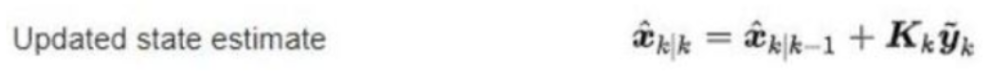

In [42]:
import numpy as np
import pandas as pd

# Initialize the state correction and covariance
initial_correction = 0  # Initial estimate of the state
initial_covariance = 1  # Initial covariance

# Create lists to hold the results
corrected_states = []
covariances = []

# Set the initial state correction and covariance
corrected_state = initial_correction
covariance = initial_covariance

# Iterate through the DataFrame
for index, row in df_predict.iterrows():
    # Get the predicted output and Kalman gain
    predicted_od = row['Predicted_OD']
    kalman_gain = row['Predicted_Kalman_Gain']
    
    # Predict step (using the predicted_OD as the predicted state)
    predicted_state = predicted_od  # In practice, this could be from a model

    # Update step (using the previous corrected state)
    residual = predicted_state - corrected_state  # Change from previous correction
    corrected_state += kalman_gain * residual
    
    # Update covariance
    covariance = (1 - kalman_gain) * covariance
    
    # Store the results
    corrected_states.append(corrected_state)
    covariances.append(covariance)

# Create a new DataFrame called df_correctedPredict as a copy of df_predict
df_correctedPredict = df_predict.copy()

# Add the corrected states and covariances to the new DataFrame
df_correctedPredict['Corrected_State'] = corrected_states
df_correctedPredict['Covariance'] = covariances

df_correctedPredict


TagID,SAP,Age,Acid_Tank_Weight,Agitator_VFD_Current_Value,Airflow_Current_Value,Antifoam_Tank_Temperature,Antifoam_Tank_Weight,Dissolved_Oxygen,Fermentor_Skid_Pressure,Fermentor_Skid_Temperature,...,Gas_Analyzer_OUR Ratio,Jacket_Temperature,Oxygen Gas (%),Seal_Pressure_Controller,Voltage_Foam_Echo_Amplitude,cP_Supplement_Tank_Weight,Predicted_Kalman_Gain,Predicted_OD,Corrected_State,Covariance
0,3CA3489,0.00,1.151515,-2.971734,-0.666176,0.328248,1.848329,2.534552,-0.056213,0.152723,...,-0.853895,0.939419,0.971967,1.462159,-1.031071,0.799969,0.916667,1.041649,0.954845,0.083333
1,3CA3489,0.03,1.151568,-2.959059,-1.164549,0.328435,1.812997,-0.863953,-0.119530,0.187117,...,-0.853895,1.335184,0.930033,1.507026,-1.135565,0.800074,0.916667,1.031586,1.025191,0.006944
2,3CA3489,0.07,1.151278,-2.946518,-1.163210,0.326914,1.810918,-1.520808,-0.119559,0.201416,...,-0.906068,0.680504,0.888100,0.901692,-1.131914,0.800179,0.916667,0.934127,0.941716,0.000579
3,3CA3489,0.10,1.151942,-2.933979,-1.165621,0.328451,1.810696,-1.095769,-0.119588,0.123088,...,-0.854881,0.442837,0.842020,-0.226428,-1.132740,0.800284,0.916667,1.037722,1.029722,0.000048
4,3CA3489,0.13,1.151639,-2.921444,-1.159191,0.326549,1.813403,-0.859336,-0.119618,0.041321,...,-0.862222,0.201435,0.795904,-0.344510,-1.129036,0.800389,0.916667,0.607193,0.642403,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42286,NCDCA2365,46.97,-1.690611,0.258889,1.266586,-1.090701,-1.825305,0.240906,0.216211,0.012490,...,1.132246,0.264934,-0.973717,0.130295,0.360976,-2.366783,0.659197,10.143320,10.130012,0.000000
42287,NCDCA2365,47.00,-1.694472,0.258890,1.268372,-1.094363,-1.823152,0.032481,0.217545,0.038702,...,1.132246,-0.688303,-0.973717,0.179088,0.335197,-2.369084,0.647657,10.071000,10.091792,0.000000
42288,NCDCA2365,47.03,-1.697124,0.258891,1.268372,-1.095927,-1.808084,0.095663,0.218879,0.009477,...,1.132246,0.103684,-0.973717,0.269831,0.356722,-2.371996,0.659530,10.140198,10.123717,0.000000
42289,NCDCA2365,47.07,-1.698783,0.258892,1.263013,-1.101680,-1.808604,0.260999,0.220213,0.058908,...,1.132246,-0.337382,-0.973717,0.248207,0.365440,-2.382796,0.647979,10.123070,10.123298,0.000000


#### Load the OD measurement as the actual values

In [43]:
import pandas as pd
file_path_Y = 'adjusted_df_Raman_Offline_OD.csv' 
df_Y = pd.read_csv(file_path_Y)

df_Y = df_Y.drop(columns=['Max1','Max2','Max3','Max4','Max5','Max6','Primary ID','Age (h)'])

# Round the values in the 'Age(hr)' column to 2 decimal points
df_Y['Age(hr)'] = df_Y['Age(hr)'].round(2)

# Rename the columns in df_Y
df_Y.rename(columns={'BatchID': 'SAP', 'Age(hr)': 'Age'}, inplace=True)

df_Y

,SAP,Age,OD- Offline measurement
0,3CA3683,0.00,0.492
1,3CA3683,2.10,NaN
2,3CA3683,3.17,NaN
3,3CA3683,4.27,NaN
4,3CA3683,5.33,NaN
...,...,...,...
238,NCDCA5242,24.00,3.560
239,NCDCA5242,33.23,NaN
240,NCDCA5242,38.00,NaN
241,NCDCA5242,43.47,NaN


#### Synchronize the Age in multiple dataset

In [44]:
import pandas as pd


# Function to modify the Age (h) value based on the last digit
def modify_age(age):
    last_digit = int(str(age)[-1])
    if last_digit in {0, 3, 7}:
        return age  # No change
    elif last_digit == 1:
        return age - 0.01
    elif last_digit == 2:
        return age + 0.01
    elif last_digit == 4:
        return age - 0.01
    elif last_digit == 5:
        return age + 0.02
    elif last_digit == 6:
        return age + 0.01
    elif last_digit == 8:
        return age - 0.01
    elif last_digit == 9:
        return age + 0.01

# Apply the function to the 'Age (h)' column
df_Y['Age'] = df_Y['Age'].apply(modify_age)


# Display the modified DataFrame
df_Y

,SAP,Age,OD- Offline measurement
0,3CA3683,0.00,0.492
1,3CA3683,2.09,NaN
2,3CA3683,3.17,NaN
3,3CA3683,4.27,NaN
4,3CA3683,5.33,NaN
...,...,...,...
238,NCDCA5242,24.00,3.560
239,NCDCA5242,33.23,NaN
240,NCDCA5242,38.00,NaN
241,NCDCA5242,43.47,NaN


In [45]:
# Merge df_Y and df_correctedPredict on 'SAP' and 'Age'
df_predict_OD = pd.merge(df_Y, df_correctedPredict, on=['SAP', 'Age'], how='right')

df_predict_OD

,SAP,Age,OD- Offline measurement,Acid_Tank_Weight,Agitator_VFD_Current_Value,Airflow_Current_Value,Antifoam_Tank_Temperature,Antifoam_Tank_Weight,Dissolved_Oxygen,Fermentor_Skid_Pressure,...,Gas_Analyzer_OUR Ratio,Jacket_Temperature,Oxygen Gas (%),Seal_Pressure_Controller,Voltage_Foam_Echo_Amplitude,cP_Supplement_Tank_Weight,Predicted_Kalman_Gain,Predicted_OD,Corrected_State,Covariance
0,3CA3489,0.00,NaN,1.151515,-2.971734,-0.666176,0.328248,1.848329,2.534552,-0.056213,...,-0.853895,0.939419,0.971967,1.462159,-1.031071,0.799969,0.916667,1.041649,0.954845,0.083333
1,3CA3489,0.03,NaN,1.151568,-2.959059,-1.164549,0.328435,1.812997,-0.863953,-0.119530,...,-0.853895,1.335184,0.930033,1.507026,-1.135565,0.800074,0.916667,1.031586,1.025191,0.006944
2,3CA3489,0.07,NaN,1.151278,-2.946518,-1.163210,0.326914,1.810918,-1.520808,-0.119559,...,-0.906068,0.680504,0.888100,0.901692,-1.131914,0.800179,0.916667,0.934127,0.941716,0.000579
3,3CA3489,0.10,NaN,1.151942,-2.933979,-1.165621,0.328451,1.810696,-1.095769,-0.119588,...,-0.854881,0.442837,0.842020,-0.226428,-1.132740,0.800284,0.916667,1.037722,1.029722,0.000048
4,3CA3489,0.13,NaN,1.151639,-2.921444,-1.159191,0.326549,1.813403,-0.859336,-0.119618,...,-0.862222,0.201435,0.795904,-0.344510,-1.129036,0.800389,0.916667,0.607193,0.642403,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40062,NCDCA2365,46.97,NaN,-1.690611,0.258889,1.266586,-1.090701,-1.825305,0.240906,0.216211,...,1.132246,0.264934,-0.973717,0.130295,0.360976,-2.366783,0.659197,10.143320,10.130012,0.000000
40063,NCDCA2365,47.00,9.96,-1.694472,0.258890,1.268372,-1.094363,-1.823152,0.032481,0.217545,...,1.132246,-0.688303,-0.973717,0.179088,0.335197,-2.369084,0.647657,10.071000,10.091792,0.000000
40064,NCDCA2365,47.03,NaN,-1.697124,0.258891,1.268372,-1.095927,-1.808084,0.095663,0.218879,...,1.132246,0.103684,-0.973717,0.269831,0.356722,-2.371996,0.659530,10.140198,10.123717,0.000000
40065,NCDCA2365,47.07,NaN,-1.698783,0.258892,1.263013,-1.101680,-1.808604,0.260999,0.220213,...,1.132246,-0.337382,-0.973717,0.248207,0.365440,-2.382796,0.647979,10.123070,10.123298,0.000000


In [46]:
# Count the number of NaN values in the 'OD- Offline measurement' column
nan_count = df_predict_OD['OD- Offline measurement'].isna().sum()

# Display the count
print(f'Number of NaN values in OD- Offline measurement: {nan_count}')
# Remove rows with any NaN values in the DataFrame
df_predict_OD_cleaned = df_predict_OD.dropna()

df_predict_OD_cleaned


Number of NaN values in OD- Offline measurement: 39979


,SAP,Age,OD- Offline measurement,Acid_Tank_Weight,Agitator_VFD_Current_Value,Airflow_Current_Value,Antifoam_Tank_Temperature,Antifoam_Tank_Weight,Dissolved_Oxygen,Fermentor_Skid_Pressure,...,Gas_Analyzer_OUR Ratio,Jacket_Temperature,Oxygen Gas (%),Seal_Pressure_Controller,Voltage_Foam_Echo_Amplitude,cP_Supplement_Tank_Weight,Predicted_Kalman_Gain,Predicted_OD,Corrected_State,Covariance
2253,3CA3683,0.0,0.492,1.201892,-2.970765,-1.180626,0.504497,1.751164,-0.552223,-0.013516,...,-0.888939,0.177891,0.925746,-0.977696,-1.077015,0.744104,0.916667,0.717815,0.970685,0.0
2613,3CA3683,12.0,1.490,1.153063,-0.118318,-1.108281,0.089973,1.309766,0.722104,-0.194735,...,1.090815,-0.536221,-0.919280,-1.088480,-0.961950,0.758661,0.632205,1.908647,1.904271,0.0
2973,3CA3683,24.0,2.980,0.580205,0.234061,-0.430386,-0.019848,0.869406,0.272729,-0.054008,...,1.304109,-1.472464,-1.270462,-1.165412,-0.478267,0.753397,0.619006,2.729961,2.740554,0.0
3063,3CA3683,27.0,3.350,0.329405,0.246511,-0.025256,-0.037706,0.758732,0.619431,-0.070882,...,0.420003,-0.602565,-0.731452,-1.181839,-0.263990,0.717436,0.618059,3.505085,3.484358,0.0
3393,3CA3683,38.0,5.420,-0.723244,0.258027,1.086937,-0.042924,-0.028460,0.162056,-0.065039,...,1.044156,-0.446157,-0.934283,-1.140107,0.070131,-0.843460,0.618960,7.708478,7.717105,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39103,NCDCA2365,15.0,2.450,0.883732,0.064097,-1.041296,-0.093948,0.538942,-0.089525,-0.121803,...,1.514705,0.260174,-1.323749,0.040640,-0.766202,0.739152,0.631094,2.325610,2.335776,0.0
39373,NCDCA2365,24.0,3.590,0.348237,0.233985,-0.422348,-0.577407,0.149243,-0.154294,-0.084865,...,1.543335,-0.271011,-1.376726,0.058074,-0.555741,0.739552,0.618829,3.361051,3.359901,0.0
39553,NCDCA2365,30.0,3.510,-0.194602,0.252735,0.384160,-0.765324,-0.140693,0.389658,-0.035344,...,1.099802,-0.536575,-0.981670,0.082025,0.025308,0.043155,0.618882,5.554160,5.235204,0.0
39703,NCDCA2365,35.0,7.560,-0.647500,0.257035,0.925405,-0.844411,-0.592120,0.500576,0.110343,...,1.132246,-0.664612,-0.973717,-0.137058,0.166586,-0.664996,0.622819,7.702014,7.707202,0.0


#### Interpolate the OD- Offline measurement

In [47]:
import pandas as pd

# Assuming df_predict_OD is already defined and contains the 'OD- Offline measurement' column
# Create a copy for interpolated values
df_predict_OD_interpolated = df_predict_OD.copy()

# Forward fill
df_predict_OD_interpolated['OD- Offline measurement_ffill'] = df_predict_OD_interpolated.groupby('SAP')['OD- Offline measurement'].transform(
    lambda x: x.ffill()
)

# Backward fill
df_predict_OD_interpolated['OD- Offline measurement_bfill'] = df_predict_OD_interpolated.groupby('SAP')['OD- Offline measurement'].transform(
    lambda x: x.bfill()
)

# Linear interpolation
df_predict_OD_interpolated['OD- Offline measurement_linear'] = df_predict_OD_interpolated.groupby('SAP')['OD- Offline measurement'].transform(
    lambda x: x.interpolate(method='linear')
)

# Polynomial interpolation (order 2 as an example)
def polynomial_interpolation(group):
    # Check if there are enough valid data points
    if group.notnull().sum() >= 3:  # Ensure at least 3 valid points for polynomial interpolation
        return group.interpolate(method='polynomial', order=2)
    else:
        return group  # Return the original group if not enough points

df_predict_OD_interpolated['OD- Offline measurement_poly'] = df_predict_OD_interpolated.groupby('SAP')['OD- Offline measurement'].transform(polynomial_interpolation)

df_predict_OD_interpolated


,SAP,Age,OD- Offline measurement,Acid_Tank_Weight,Agitator_VFD_Current_Value,Airflow_Current_Value,Antifoam_Tank_Temperature,Antifoam_Tank_Weight,Dissolved_Oxygen,Fermentor_Skid_Pressure,...,Voltage_Foam_Echo_Amplitude,cP_Supplement_Tank_Weight,Predicted_Kalman_Gain,Predicted_OD,Corrected_State,Covariance,OD- Offline measurement_ffill,OD- Offline measurement_bfill,OD- Offline measurement_linear,OD- Offline measurement_poly
0,3CA3489,0.00,NaN,1.151515,-2.971734,-0.666176,0.328248,1.848329,2.534552,-0.056213,...,-1.031071,0.799969,0.916667,1.041649,0.954845,0.083333,NaN,NaN,NaN,NaN
1,3CA3489,0.03,NaN,1.151568,-2.959059,-1.164549,0.328435,1.812997,-0.863953,-0.119530,...,-1.135565,0.800074,0.916667,1.031586,1.025191,0.006944,NaN,NaN,NaN,NaN
2,3CA3489,0.07,NaN,1.151278,-2.946518,-1.163210,0.326914,1.810918,-1.520808,-0.119559,...,-1.131914,0.800179,0.916667,0.934127,0.941716,0.000579,NaN,NaN,NaN,NaN
3,3CA3489,0.10,NaN,1.151942,-2.933979,-1.165621,0.328451,1.810696,-1.095769,-0.119588,...,-1.132740,0.800284,0.916667,1.037722,1.029722,0.000048,NaN,NaN,NaN,NaN
4,3CA3489,0.13,NaN,1.151639,-2.921444,-1.159191,0.326549,1.813403,-0.859336,-0.119618,...,-1.129036,0.800389,0.916667,0.607193,0.642403,0.000004,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40062,NCDCA2365,46.97,NaN,-1.690611,0.258889,1.266586,-1.090701,-1.825305,0.240906,0.216211,...,0.360976,-2.366783,0.659197,10.143320,10.130012,0.000000,7.56,9.96,9.953333,9.972331
40063,NCDCA2365,47.00,9.96,-1.694472,0.258890,1.268372,-1.094363,-1.823152,0.032481,0.217545,...,0.335197,-2.369084,0.647657,10.071000,10.091792,0.000000,9.96,9.96,9.960000,9.960000
40064,NCDCA2365,47.03,NaN,-1.697124,0.258891,1.268372,-1.095927,-1.808084,0.095663,0.218879,...,0.356722,-2.371996,0.659530,10.140198,10.123717,0.000000,9.96,NaN,9.960000,NaN
40065,NCDCA2365,47.07,NaN,-1.698783,0.258892,1.263013,-1.101680,-1.808604,0.260999,0.220213,...,0.365440,-2.382796,0.647979,10.123070,10.123298,0.000000,9.96,NaN,9.960000,NaN


Remove rows where no OD-Offline measurement data available under each SAP.

In [48]:
import pandas as pd

# Assuming df_predict_OD_interpolated is already defined

# Check for SAP subcategories with all NaN in 'OD- Offline measurement'
nan_groups = df_predict_OD_interpolated.groupby('SAP')['OD- Offline measurement'].apply(lambda x: x.isna().all())

# Filter to get SAP subcategories that have all NaN values
all_nan_sap = nan_groups[nan_groups].index.tolist()

# Display the result
#print("SAP subcategories with all NaN in 'OD- Offline measurement':", all_nan_sap)
all_nan_sap

df_predict_OD_interpolated = df_predict_OD_interpolated[~df_predict_OD_interpolated['SAP'].isin(all_nan_sap)]
df_predict_OD_interpolated

,SAP,Age,OD- Offline measurement,Acid_Tank_Weight,Agitator_VFD_Current_Value,Airflow_Current_Value,Antifoam_Tank_Temperature,Antifoam_Tank_Weight,Dissolved_Oxygen,Fermentor_Skid_Pressure,...,Voltage_Foam_Echo_Amplitude,cP_Supplement_Tank_Weight,Predicted_Kalman_Gain,Predicted_OD,Corrected_State,Covariance,OD- Offline measurement_ffill,OD- Offline measurement_bfill,OD- Offline measurement_linear,OD- Offline measurement_poly
2253,3CA3683,0.00,0.492,1.201892,-2.970765,-1.180626,0.504497,1.751164,-0.552223,-0.013516,...,-1.077015,0.744104,0.916667,0.717815,0.970685,0.0,0.492,0.492,0.492000,0.492000
2254,3CA3683,0.03,NaN,1.201920,-2.958119,-1.159191,0.504192,1.751684,-0.471279,-0.043419,...,-1.150298,0.743882,0.916667,0.786540,0.801886,0.0,0.492,1.490,0.494772,0.493955
2255,3CA3683,0.07,NaN,1.202537,-2.945684,-1.169908,0.503562,1.752463,-0.912373,-0.073322,...,-1.150632,0.743804,0.916667,0.777223,0.779278,0.0,0.492,1.490,0.497544,0.495915
2256,3CA3683,0.10,NaN,1.202798,-2.933145,-1.163784,0.501410,1.753243,-1.178866,-0.103225,...,-1.151732,0.743652,0.916667,0.738022,0.741460,0.0,0.492,1.490,0.500317,0.497879
2257,3CA3683,0.13,NaN,1.202614,-2.920713,-1.159191,0.500500,1.749190,-1.268859,-0.133127,...,-1.146484,0.743385,0.916667,0.664244,0.670679,0.0,0.492,1.490,0.503089,0.499848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40062,NCDCA2365,46.97,NaN,-1.690611,0.258889,1.266586,-1.090701,-1.825305,0.240906,0.216211,...,0.360976,-2.366783,0.659197,10.143320,10.130012,0.0,7.560,9.960,9.953333,9.972331
40063,NCDCA2365,47.00,9.960,-1.694472,0.258890,1.268372,-1.094363,-1.823152,0.032481,0.217545,...,0.335197,-2.369084,0.647657,10.071000,10.091792,0.0,9.960,9.960,9.960000,9.960000
40064,NCDCA2365,47.03,NaN,-1.697124,0.258891,1.268372,-1.095927,-1.808084,0.095663,0.218879,...,0.356722,-2.371996,0.659530,10.140198,10.123717,0.0,9.960,NaN,9.960000,NaN
40065,NCDCA2365,47.07,NaN,-1.698783,0.258892,1.263013,-1.101680,-1.808604,0.260999,0.220213,...,0.365440,-2.382796,0.647979,10.123070,10.123298,0.0,9.960,NaN,9.960000,NaN


In [49]:
import pandas as pd

# Assuming df_predict_OD_interpolated is already defined

# Linear interpolation based on Age for each SAP group
def linear_interpolation(group):
    return group['OD- Offline measurement'].interpolate(method='linear')

# Apply the interpolation
df_predict_OD_interpolated['OD- Offline measurement'] = (
    df_predict_OD_interpolated.groupby('SAP').apply(linear_interpolation).reset_index(level=0, drop=True)
)

df_predict_OD_interpolated


C:\Users\U1031072\AppData\Local\Temp\ipykernel_16016\4288196807.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict_OD_interpolated['OD- Offline measurement'] = (


,SAP,Age,OD- Offline measurement,Acid_Tank_Weight,Agitator_VFD_Current_Value,Airflow_Current_Value,Antifoam_Tank_Temperature,Antifoam_Tank_Weight,Dissolved_Oxygen,Fermentor_Skid_Pressure,...,Voltage_Foam_Echo_Amplitude,cP_Supplement_Tank_Weight,Predicted_Kalman_Gain,Predicted_OD,Corrected_State,Covariance,OD- Offline measurement_ffill,OD- Offline measurement_bfill,OD- Offline measurement_linear,OD- Offline measurement_poly
2253,3CA3683,0.00,0.492000,1.201892,-2.970765,-1.180626,0.504497,1.751164,-0.552223,-0.013516,...,-1.077015,0.744104,0.916667,0.717815,0.970685,0.0,0.492,0.492,0.492000,0.492000
2254,3CA3683,0.03,0.494772,1.201920,-2.958119,-1.159191,0.504192,1.751684,-0.471279,-0.043419,...,-1.150298,0.743882,0.916667,0.786540,0.801886,0.0,0.492,1.490,0.494772,0.493955
2255,3CA3683,0.07,0.497544,1.202537,-2.945684,-1.169908,0.503562,1.752463,-0.912373,-0.073322,...,-1.150632,0.743804,0.916667,0.777223,0.779278,0.0,0.492,1.490,0.497544,0.495915
2256,3CA3683,0.10,0.500317,1.202798,-2.933145,-1.163784,0.501410,1.753243,-1.178866,-0.103225,...,-1.151732,0.743652,0.916667,0.738022,0.741460,0.0,0.492,1.490,0.500317,0.497879
2257,3CA3683,0.13,0.503089,1.202614,-2.920713,-1.159191,0.500500,1.749190,-1.268859,-0.133127,...,-1.146484,0.743385,0.916667,0.664244,0.670679,0.0,0.492,1.490,0.503089,0.499848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40062,NCDCA2365,46.97,9.953333,-1.690611,0.258889,1.266586,-1.090701,-1.825305,0.240906,0.216211,...,0.360976,-2.366783,0.659197,10.143320,10.130012,0.0,7.560,9.960,9.953333,9.972331
40063,NCDCA2365,47.00,9.960000,-1.694472,0.258890,1.268372,-1.094363,-1.823152,0.032481,0.217545,...,0.335197,-2.369084,0.647657,10.071000,10.091792,0.0,9.960,9.960,9.960000,9.960000
40064,NCDCA2365,47.03,9.960000,-1.697124,0.258891,1.268372,-1.095927,-1.808084,0.095663,0.218879,...,0.356722,-2.371996,0.659530,10.140198,10.123717,0.0,9.960,NaN,9.960000,NaN
40065,NCDCA2365,47.07,9.960000,-1.698783,0.258892,1.263013,-1.101680,-1.808604,0.260999,0.220213,...,0.365440,-2.382796,0.647979,10.123070,10.123298,0.0,9.960,NaN,9.960000,NaN


In [50]:
import pandas as pd

# Forward fill
df_predict_OD_interpolated['OD- Offline measurement_ffill'] = df_predict_OD_interpolated.groupby('SAP')['OD- Offline measurement'].transform(lambda x: x.ffill())

# Backward fill
df_predict_OD_interpolated['OD- Offline measurement_bfill'] = df_predict_OD_interpolated.groupby('SAP')['OD- Offline measurement'].transform(lambda x: x.bfill())

# Linear interpolation
df_predict_OD_interpolated['OD- Offline measurement_linear'] = df_predict_OD_interpolated.groupby('SAP')['OD- Offline measurement'].transform(lambda x: x.interpolate(method='linear'))

# Polynomial interpolation (order 2), checking the number of valid points
def polynomial_interpolation(group):
    if group.count() >= 3:  # At least 3 points are needed for a quadratic polynomial
        return group.interpolate(method='polynomial', order=2)
    else:
        return group  # Return the group unchanged if not enough points

df_predict_OD_interpolated['OD- Offline measurement_poly'] = df_predict_OD_interpolated.groupby('SAP')['OD- Offline measurement'].transform(polynomial_interpolation)

df_predict_OD_interpolated


C:\Users\U1031072\AppData\Local\Temp\ipykernel_16016\1718872485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict_OD_interpolated['OD- Offline measurement_ffill'] = df_predict_OD_interpolated.groupby('SAP')['OD- Offline measurement'].transform(lambda x: x.ffill())
C:\Users\U1031072\AppData\Local\Temp\ipykernel_16016\1718872485.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict_OD_interpolated['OD- Offline measurement_bfill'] = df_predict_OD_interpolated.groupby('SAP')['OD- Offline m

,SAP,Age,OD- Offline measurement,Acid_Tank_Weight,Agitator_VFD_Current_Value,Airflow_Current_Value,Antifoam_Tank_Temperature,Antifoam_Tank_Weight,Dissolved_Oxygen,Fermentor_Skid_Pressure,...,Voltage_Foam_Echo_Amplitude,cP_Supplement_Tank_Weight,Predicted_Kalman_Gain,Predicted_OD,Corrected_State,Covariance,OD- Offline measurement_ffill,OD- Offline measurement_bfill,OD- Offline measurement_linear,OD- Offline measurement_poly
2253,3CA3683,0.00,0.492000,1.201892,-2.970765,-1.180626,0.504497,1.751164,-0.552223,-0.013516,...,-1.077015,0.744104,0.916667,0.717815,0.970685,0.0,0.492000,0.492000,0.492000,0.492000
2254,3CA3683,0.03,0.494772,1.201920,-2.958119,-1.159191,0.504192,1.751684,-0.471279,-0.043419,...,-1.150298,0.743882,0.916667,0.786540,0.801886,0.0,0.494772,0.494772,0.494772,0.494772
2255,3CA3683,0.07,0.497544,1.202537,-2.945684,-1.169908,0.503562,1.752463,-0.912373,-0.073322,...,-1.150632,0.743804,0.916667,0.777223,0.779278,0.0,0.497544,0.497544,0.497544,0.497544
2256,3CA3683,0.10,0.500317,1.202798,-2.933145,-1.163784,0.501410,1.753243,-1.178866,-0.103225,...,-1.151732,0.743652,0.916667,0.738022,0.741460,0.0,0.500317,0.500317,0.500317,0.500317
2257,3CA3683,0.13,0.503089,1.202614,-2.920713,-1.159191,0.500500,1.749190,-1.268859,-0.133127,...,-1.146484,0.743385,0.916667,0.664244,0.670679,0.0,0.503089,0.503089,0.503089,0.503089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40062,NCDCA2365,46.97,9.953333,-1.690611,0.258889,1.266586,-1.090701,-1.825305,0.240906,0.216211,...,0.360976,-2.366783,0.659197,10.143320,10.130012,0.0,9.953333,9.953333,9.953333,9.953333
40063,NCDCA2365,47.00,9.960000,-1.694472,0.258890,1.268372,-1.094363,-1.823152,0.032481,0.217545,...,0.335197,-2.369084,0.647657,10.071000,10.091792,0.0,9.960000,9.960000,9.960000,9.960000
40064,NCDCA2365,47.03,9.960000,-1.697124,0.258891,1.268372,-1.095927,-1.808084,0.095663,0.218879,...,0.356722,-2.371996,0.659530,10.140198,10.123717,0.0,9.960000,9.960000,9.960000,9.960000
40065,NCDCA2365,47.07,9.960000,-1.698783,0.258892,1.263013,-1.101680,-1.808604,0.260999,0.220213,...,0.365440,-2.382796,0.647979,10.123070,10.123298,0.0,9.960000,9.960000,9.960000,9.960000


## Model Evaluation

### 01 Using Non-interpolated OD

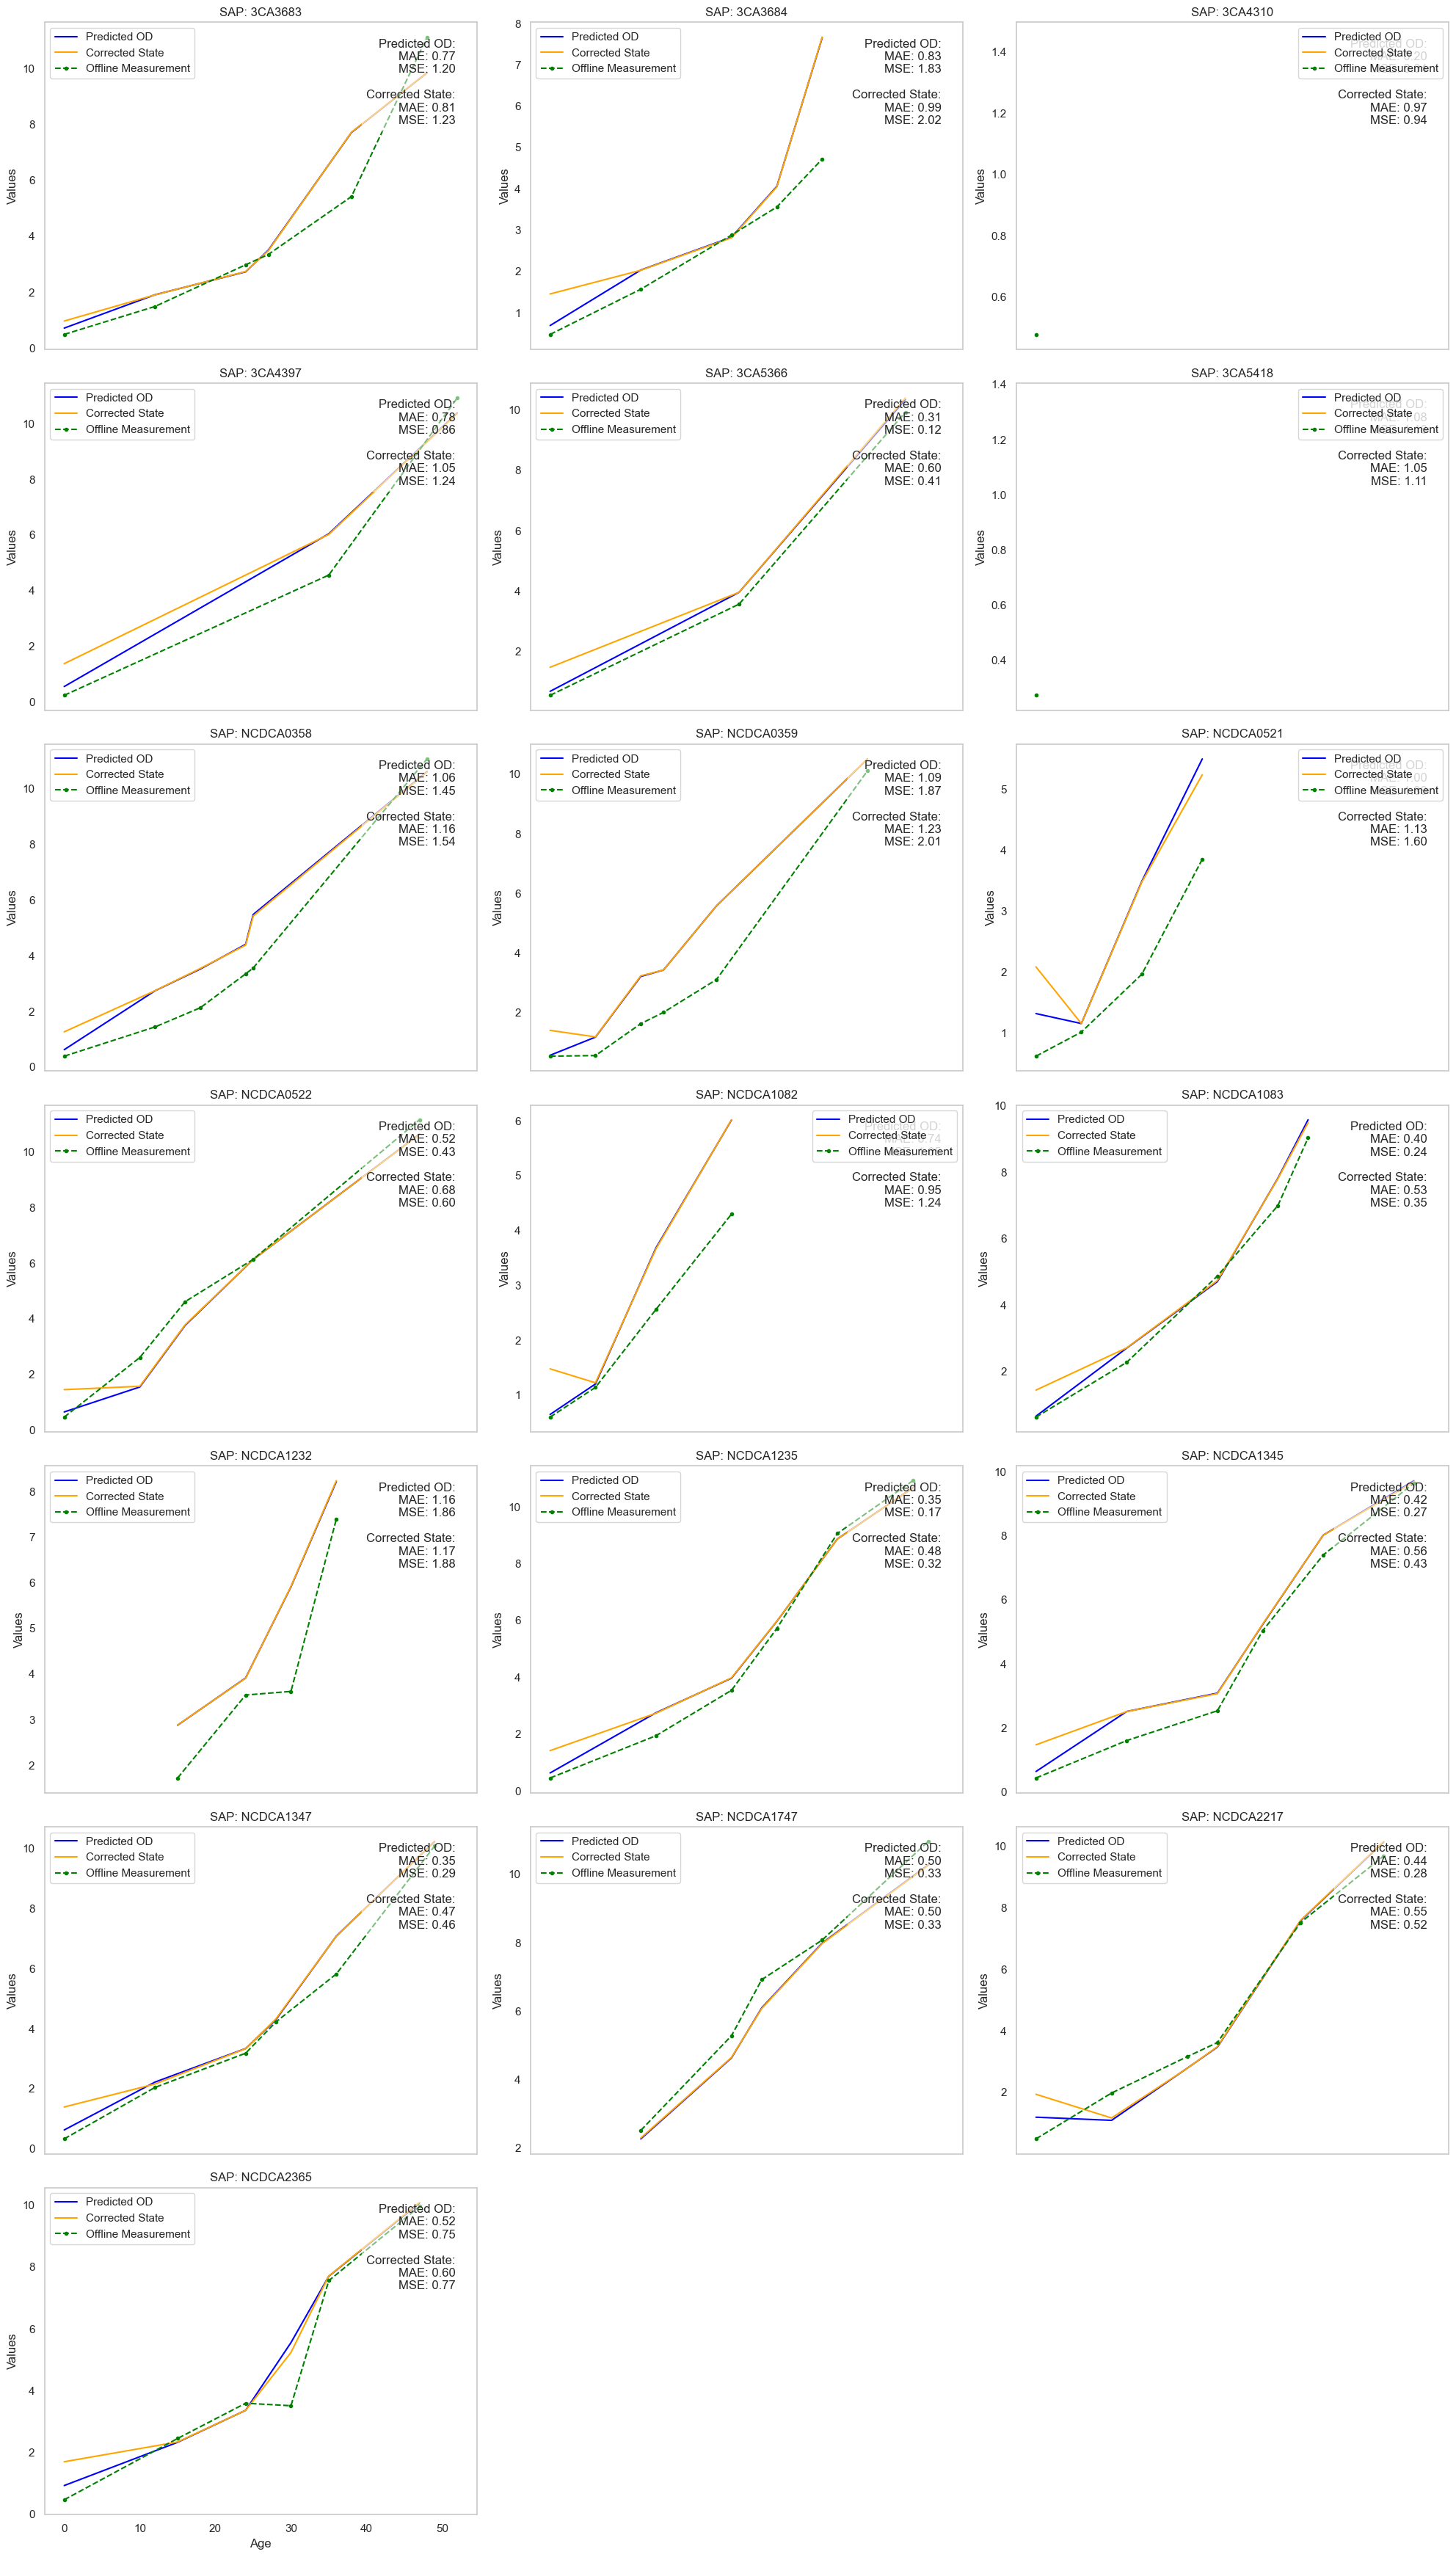

Model evaluation with interpolated OD:


,Prediction,Correction,%change
MAE,0.6598,0.8141,18.95
MSE,0.8198,1.0000,18.02


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Get unique SAP values
unique_saps = df_predict_OD_cleaned['SAP'].unique()

# Initialize lists to store metrics
mae_predicted_list = []
mae_corrected_list = []
mse_predicted_list = []
mse_corrected_list = []

# Determine the number of rows needed for subplots
num_saps = len(unique_saps)
num_cols = 3  # Number of columns for the subplots
num_rows = (num_saps + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Set up the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows), sharex=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through each unique SAP and plot
for ax, sap in zip(axes, unique_saps):
    # Filter the DataFrame for the current SAP
    sap_data = df_predict_OD_cleaned[df_predict_OD_cleaned['SAP'] == sap]
    
    # Calculate MAE, MSE, and R² using non-NaN values
    valid_data = sap_data.dropna(subset=['OD- Offline measurement'])
    if not valid_data.empty:
        # Calculate for Predicted_OD
        mae_predicted = mean_absolute_error(valid_data['OD- Offline measurement'], valid_data['Predicted_OD'])
        mse_predicted = mean_squared_error(valid_data['OD- Offline measurement'], valid_data['Predicted_OD'])
        
        # Calculate for Corrected_State
        mae_corrected = mean_absolute_error(valid_data['OD- Offline measurement'], valid_data['Corrected_State'])
        mse_corrected = mean_squared_error(valid_data['OD- Offline measurement'], valid_data['Corrected_State'])

        # Append metrics to the lists
        mae_predicted_list.append(mae_predicted)
        mse_predicted_list.append(mse_predicted)
        mae_corrected_list.append(mae_corrected)
        mse_corrected_list.append(mse_corrected)
        
        # Add MAE and MSE to the plot in the bottom right corner
        ax.text(0.95, 0.95, f'Predicted OD:\nMAE: {mae_predicted:.2f}\nMSE: {mse_predicted:.2f}\n\n'
                f'Corrected State:\nMAE: {mae_corrected:.2f}\nMSE: {mse_corrected:.2f}',
                transform=ax.transAxes, fontsize=12, verticalalignment='top',
                horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    # Plot Predicted_OD and Corrected_State
    ax.plot(sap_data['Age'], sap_data['Predicted_OD'], label='Predicted OD', color='blue')
    ax.plot(sap_data['Age'], sap_data['Corrected_State'], label='Corrected State', color='orange')
    
    # Plot OD- Offline Measurement, skipping NaN values for this specific plot
    ax.plot(sap_data['Age'], sap_data['OD- Offline measurement'], label='Offline Measurement', color='green', linestyle='--', 
            marker='o', markersize=3)

    # Set titles and labels
    ax.set_title(f'SAP: {sap}')
    ax.set_ylabel('Values')
    ax.legend()
    ax.grid()

# Hide any unused subplots
for i in range(len(unique_saps), num_rows * num_cols):
    fig.delaxes(axes[i])

# Set the x-axis label for the bottom row
for ax in axes[-num_cols:]:
    ax.set_xlabel('Age')

# Adjust layout
plt.tight_layout()
plt.show()

# Calculate averages
average_mae_predicted = sum(mae_predicted_list) / len(mae_predicted_list)
average_mae_corrected = sum(mae_corrected_list) / len(mae_corrected_list)
average_mse_predicted = sum(mse_predicted_list) / len(mse_predicted_list)
average_mse_corrected = sum(mse_corrected_list) / len(mse_corrected_list)

# Create a new DataFrame for the average metrics in the desired format
average_metrics_df = pd.DataFrame({
    'Prediction': [average_mae_predicted, average_mse_predicted],
    'Correction': [average_mae_corrected, average_mse_corrected]
}, index=['MAE', 'MSE'])

# Calculate %drop and add it as a new column
average_metrics_df['%change'] = ((average_metrics_df['Correction'] - average_metrics_df['Prediction']) / average_metrics_df['Correction'] * 100).round(2)

# Round values to four decimal places
average_metrics_df = average_metrics_df.round(4)

# Display the DataFrame
print("Model evaluation with interpolated OD:")
average_metrics_df


#### Check the Outliers

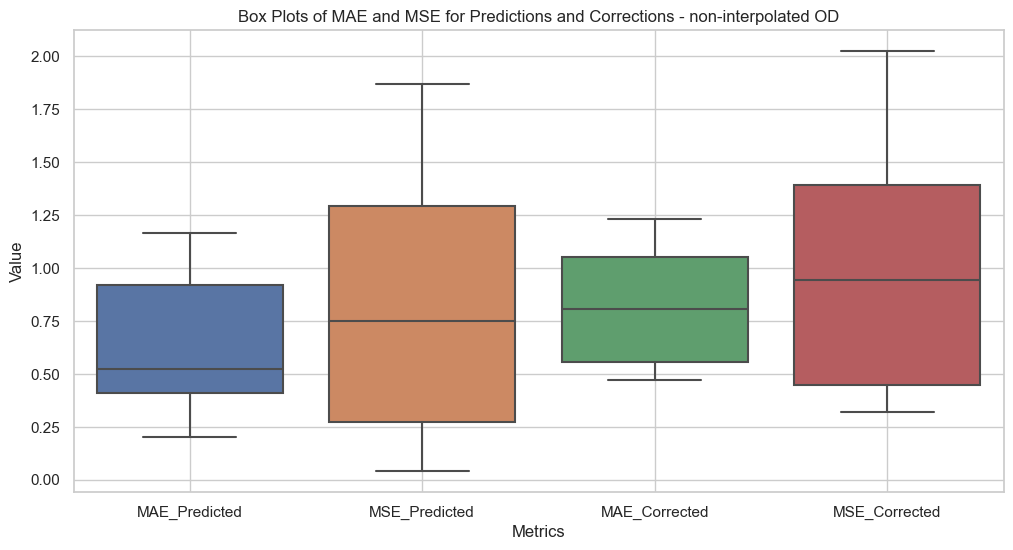

In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the lists into a DataFrame
metrics_dict = {
    'MAE_Predicted': mae_predicted_list,
    'MSE_Predicted': mse_predicted_list,
    'MAE_Corrected': mae_corrected_list,
    'MSE_Corrected': mse_corrected_list
}

metrics_df = pd.DataFrame(metrics_dict)

# Reshape the DataFrame for plotting
metrics_melted = metrics_df.melt(var_name='Metric', value_name='Value')

# Create box plots for MAE and MSE
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Value', data=metrics_melted)
plt.title('Box Plots of MAE and MSE for Predictions and Corrections - non-interpolated OD')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.grid(True)
plt.show()


### 02 Using Interpolated OD

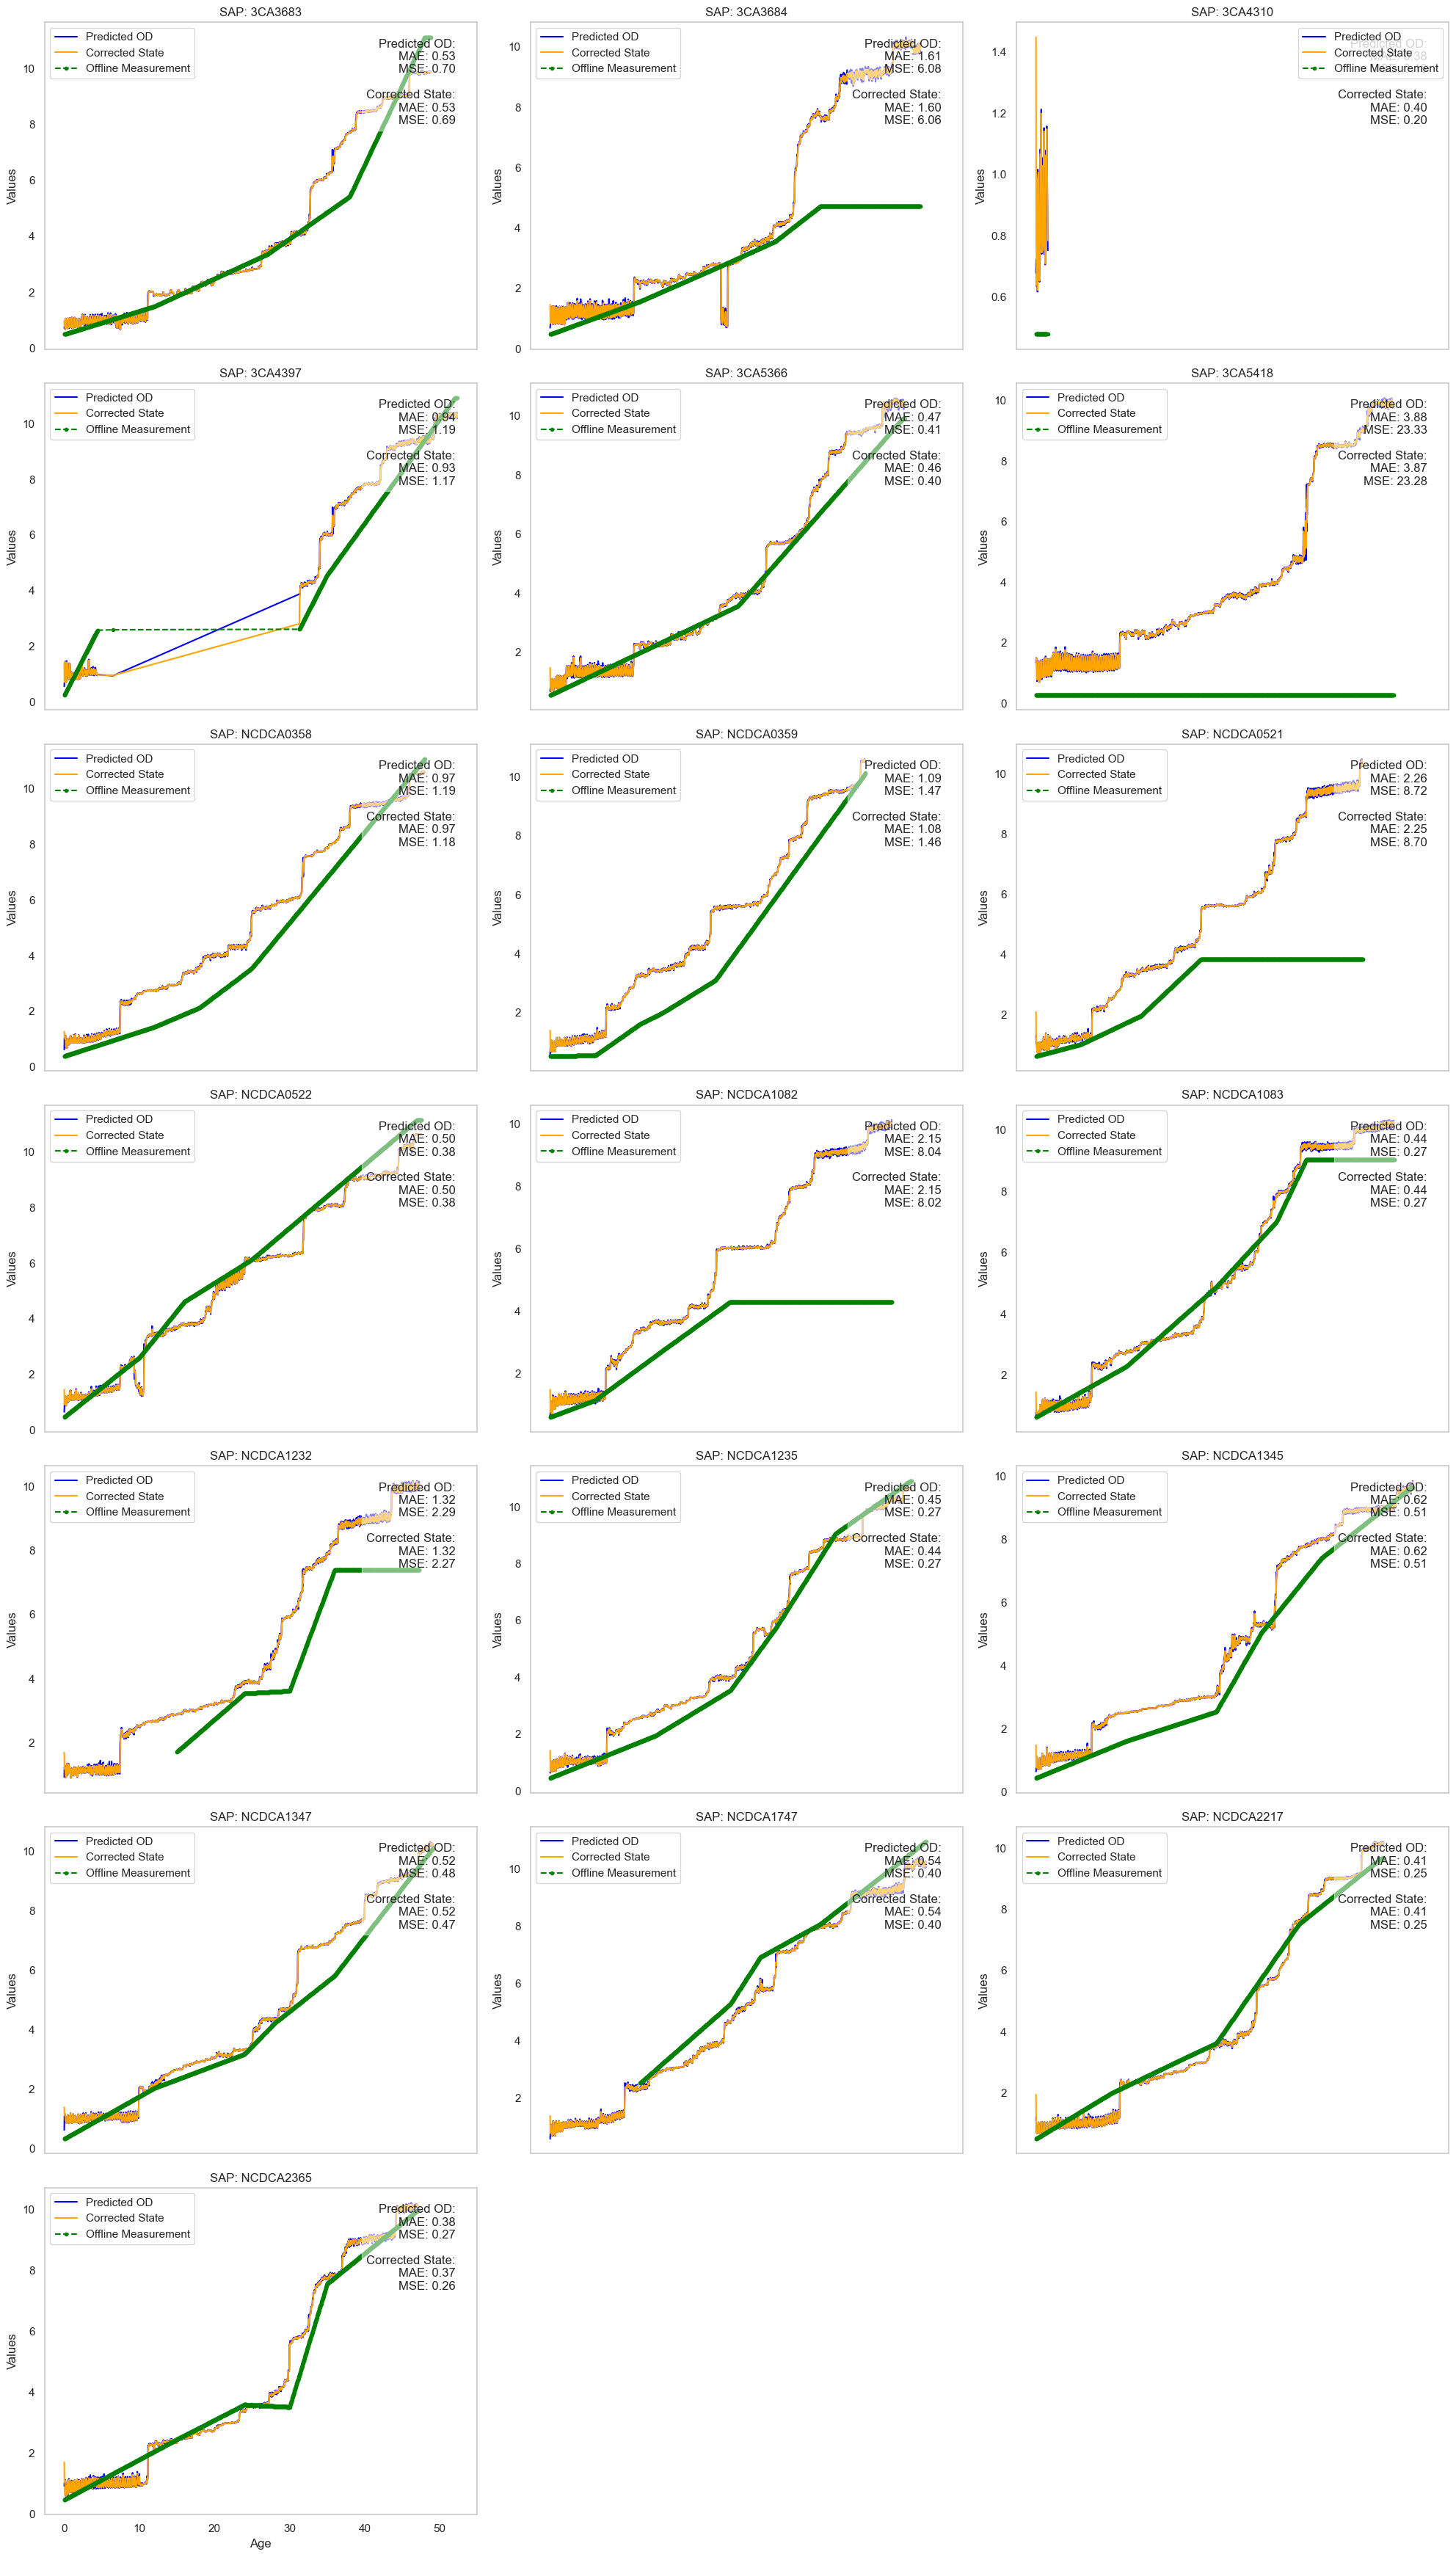

Model evaluation with interpolated OD:


,Prediction,Correction,%drop
MAE,1.0233,1.0213,-0.20
MSE,2.9695,2.9600,-0.32


In [231]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Get unique SAP values
unique_saps = df_predict_OD_interpolated['SAP'].unique()

# Initialize lists to store metrics
mae_predicted_list = []
mae_corrected_list = []
mse_predicted_list = []
mse_corrected_list = []

# Determine the number of rows needed
num_saps = len(unique_saps)
num_cols = 3  # Set number of columns for the subplots
num_rows = (num_saps + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Set up the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows), sharex=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through each unique SAP and plot
for ax, sap in zip(axes, unique_saps):
    # Filter the DataFrame for the current SAP
    sap_data = df_predict_OD_interpolated[df_predict_OD_interpolated['SAP'] == sap]
    
    # Calculate MAE, MSE, and R² using non-NaN values
    valid_data = sap_data.dropna(subset=['OD- Offline measurement'])
    if not valid_data.empty:
        # Calculate for Predicted_OD
        mae_predicted = mean_absolute_error(valid_data['OD- Offline measurement'], valid_data['Predicted_OD'])
        mse_predicted = mean_squared_error(valid_data['OD- Offline measurement'], valid_data['Predicted_OD'])
        
        # Calculate for Corrected_State
        mae_corrected = mean_absolute_error(valid_data['OD- Offline measurement'], valid_data['Corrected_State'])
        mse_corrected = mean_squared_error(valid_data['OD- Offline measurement'], valid_data['Corrected_State'])

        # Append metrics to the lists
        mae_predicted_list.append(mae_predicted)
        mse_predicted_list.append(mse_predicted)
        mae_corrected_list.append(mae_corrected)
        mse_corrected_list.append(mse_corrected)
        
        # Add MAE and MSE to the plot
        ax.text(0.95, 0.95, f'Predicted OD:\nMAE: {mae_predicted:.2f}\nMSE: {mse_predicted:.2f}\n\n'
                f'Corrected State:\nMAE: {mae_corrected:.2f}\nMSE: {mse_corrected:.2f}',
                transform=ax.transAxes, fontsize=12, verticalalignment='top',
                horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

        # Plotting
        ax.plot(sap_data['Age'], sap_data['Predicted_OD'], label='Predicted OD', color='blue')
        ax.plot(sap_data['Age'], sap_data['Corrected_State'], label='Corrected State', color='orange')
        ax.plot(sap_data['Age'], sap_data['OD- Offline measurement'], label='Offline Measurement', color='green', linestyle='--', 
                marker='o', markersize=3)

        # Set titles and labels
        ax.set_title(f'SAP: {sap}')
        ax.set_ylabel('Values')
        ax.legend()
        ax.grid()

# Hide any unused subplots
for i in range(len(unique_saps), num_rows * num_cols):
    fig.delaxes(axes[i])

# Set the x-axis label for the bottom row
for ax in axes[-num_cols:]:
    ax.set_xlabel('Age')

# Adjust layout
plt.tight_layout()
plt.show()

# Calculate average metrics across all batches
average_mae_predicted = np.mean(mae_predicted_list)
average_mse_predicted = np.mean(mse_predicted_list)
average_mae_corrected = np.mean(mae_corrected_list)
average_mse_corrected = np.mean(mse_corrected_list)

# Create a new DataFrame for the average metrics in the desired format
average_metrics_df = pd.DataFrame({
    'Prediction': [average_mae_predicted, average_mse_predicted],
    'Correction': [average_mae_corrected, average_mse_corrected]
}, index=['MAE', 'MSE'])

# Round values to two significant digits
average_metrics_df = average_metrics_df.round(4)

# Calculate %drop and add it as a new column
average_metrics_df['%drop'] = ((average_metrics_df['Correction'] - average_metrics_df['Prediction']) / average_metrics_df['Correction'] * 100).round(2)

# Print the results
print("Model evaluation with interpolated OD:")
average_metrics_df


#### Check the Outliers

In [215]:
pip install seaborn

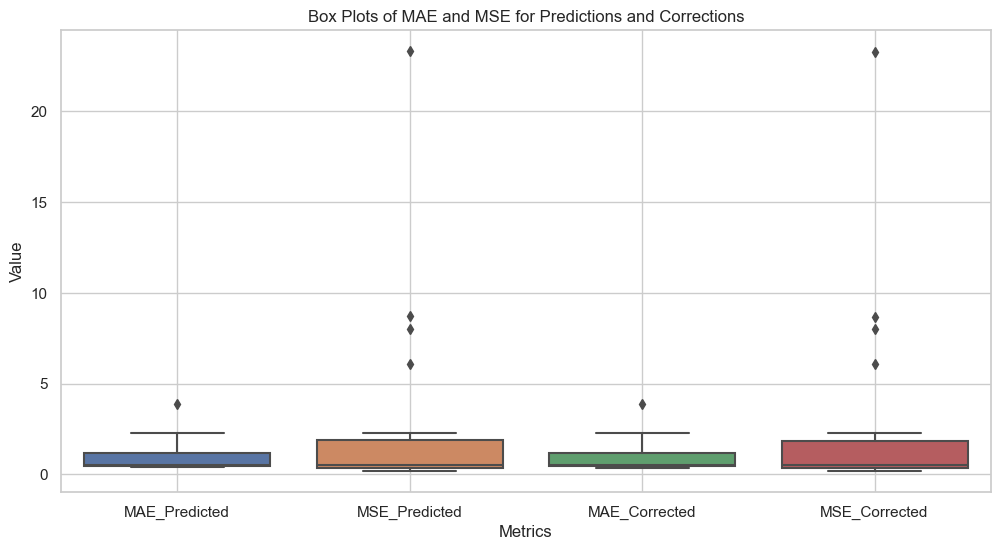

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the lists into a DataFrame
metrics_dict = {
    'MAE_Predicted': mae_predicted_list,
    'MSE_Predicted': mse_predicted_list,
    'MAE_Corrected': mae_corrected_list,
    'MSE_Corrected': mse_corrected_list
}

metrics_df = pd.DataFrame(metrics_dict)

# Reshape the DataFrame for plotting
metrics_melted = metrics_df.melt(var_name='Metric', value_name='Value')

# Create box plots for MAE and MSE
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Value', data=metrics_melted)
plt.title('Box Plots of MAE and MSE for Predictions and Corrections')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.grid(True)
plt.show()


In [224]:
import numpy as np
import pandas as pd

def remove_outliers(data):
    """Remove outliers using the IQR method."""
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remove outliers
mae_predicted_cleaned = remove_outliers(np.array(mae_predicted_list))
mse_predicted_cleaned = remove_outliers(np.array(mse_predicted_list))
mae_corrected_cleaned = remove_outliers(np.array(mae_corrected_list))
mse_corrected_cleaned = remove_outliers(np.array(mse_corrected_list))

# Calculate averages after removing outliers
average_metrics_cleaned = {
    'MAE_Predicted': np.mean(mae_predicted_cleaned),
    'MSE_Predicted': np.mean(mse_predicted_cleaned),
    'MAE_Corrected': np.mean(mae_corrected_cleaned),
    'MSE_Corrected': np.mean(mse_corrected_cleaned)
}

# Create a new DataFrame for average metrics
average_metrics_df_cleaned = pd.DataFrame(average_metrics_cleaned, index=[0])

# Calculate %drop based on the average metrics
average_metrics_cleaned['%drop'] = (average_metrics_cleaned['MAE_Corrected'] - average_metrics_cleaned['MAE_Predicted']) / average_metrics_cleaned['MAE_Corrected'] * 100

# Restructure the DataFrame
average_metrics_final = pd.DataFrame({
    'Prediction': [average_metrics_cleaned['MAE_Predicted'], average_metrics_cleaned['MSE_Predicted']],
    'Correction': [average_metrics_cleaned['MAE_Corrected'], average_metrics_cleaned['MSE_Corrected']],
    '%drop': [
        (average_metrics_cleaned['MAE_Corrected'] - average_metrics_cleaned['MAE_Predicted']) / average_metrics_cleaned['MAE_Corrected'] * 100,
        (average_metrics_cleaned['MSE_Corrected'] - average_metrics_cleaned['MSE_Predicted']) / average_metrics_cleaned['MSE_Corrected'] * 100
    ]
}, index=['MAE', 'MSE'])

# Print the title and display the final DataFrame
print("Model evaluation with interpolated OD after removing outliers:")
average_metrics_final


Model evaluation with interpolated OD after removing outliers:


,Prediction,Correction,%drop
MAE,0.864744,0.862881,-0.215846
MSE,0.683781,0.679090,-0.690737
